#**ĐỒ ÁN CUỐI KỲ HỌC MÁY THỐNG KÊ (DS102.O12.CNCL)**
## **Nhóm 3**

In [1]:
#kết nối với drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.Import các thư viện##

In [2]:
#import thư viện
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

##2.Đọc dữ liệu

In [3]:
# đọc dữ liệu train
train_df=pd.read_csv("/content/drive/MyDrive/DS102/Data_Project/train.csv", index_col=0)
#đọc dữ liệu test
test_df=pd.read_csv("/content/drive/MyDrive/DS102/Data_Project/test.csv")
#độc dữ liệu dev
dev_df=pd.read_csv("/content/drive/MyDrive/DS102/Data_Project/dev.csv")

In [4]:
# kích thước của bảng train_df
train_df.shape

(125973, 42)

In [ ]:
# kích thước của bảng test_df
test_df.shape

(18035, 42)

In [ ]:
# kích thước của bảng dev_df
dev_df.shape

(4509, 42)

In thông tin cơ bản về DataFrame

In [5]:
#xuất bảng train_df
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# Xuất bản test_df
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,http,S0,0,0,0,0,0,0,...,38,0.15,0.05,0.01,0.00,1.0,1.0,0.00,0.0,attack
1,0,tcp,http,SF,216,831,0,0,0,0,...,255,1.00,0.00,0.07,0.03,0.0,0.0,0.00,0.0,normal
2,0,tcp,http,REJ,0,0,0,0,0,0,...,28,0.11,0.58,0.01,0.00,0.0,0.0,0.94,1.0,attack
3,1,tcp,smtp,SF,826,336,0,0,0,0,...,134,0.56,0.03,0.01,0.01,0.0,0.0,0.00,0.0,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.54,0.00,0.00,0.0,0.0,0.49,1.0,attack


In [ ]:
# Xuất bản dev_df
dev_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,http,SF,326,501,0,0,0,0,...,255,1.00,0.00,0.06,0.06,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,attack
2,7408,tcp,telnet,SF,0,44,0,0,0,0,...,222,0.87,0.02,0.00,0.00,0.33,0.38,0.12,0.06,attack
3,0,tcp,auth,S0,0,0,0,0,0,0,...,3,0.01,0.07,0.00,0.00,1.00,1.00,0.00,0.00,attack
4,0,tcp,ftp_data,SF,5929,0,0,0,0,0,...,22,0.47,0.09,0.47,0.00,0.00,0.00,0.00,0.00,normal


Info DataFrame

In [ ]:
#thống kê kiểu dữ liệu của tường thuộc tính và giá trị
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
#đếm các giá trị null của từng fearues  của bảng train
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
#đếm các giá trị null của từng fearues  của bảng dev
dev_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Kiểm tra số dòng trùng lặp của các bảng

In [ ]:
#kiểm tra số dòng trùng lặp của các bảng
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())
print(dev_df.duplicated().sum())

0
21
1


Mô tả các thuộc tính của DataFrame

In [ ]:
#mô tả các thuộc tính của train_df
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#mô tả các thuộc tính của bảng dev
dev_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4509.000000,4.509000e+03,4509.000000,4509.000000,4509.000000,4509.0,4509.000000,4509.000000,4509.000000,4509.000000,...,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000
mean,233.101353,7.712608e+03,2070.008871,0.000444,0.023287,0.0,0.133067,0.009980,0.394544,0.194722,...,188.121978,120.011089,0.534622,0.083202,0.142322,0.025904,0.233812,0.230581,0.156221,0.152193
std,1954.972275,1.222750e+05,21056.905537,0.021058,0.258208,0.0,1.601779,0.099411,0.488807,11.204074,...,96.945018,111.194167,0.447325,0.192497,0.306495,0.099521,0.414206,0.416305,0.340495,0.350023
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,100.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,78.000000,0.610000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.630000e+02,478.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.110000,0.010000,0.000000,0.000000
max,38890.000000,5.135678e+06,988002.000000,1.000000,3.000000,0.0,30.000000,1.000000,1.000000,751.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Kiểm tra giá trị không lập lại của từng Features

In [ ]:
# thống kê từng thành phần trong từng thuộc tính có trong bảng
def Value_union(train_df, name_column):
  return train_df[name_column].value_counts()

# Tạo một danh sách các tên cột cần tính toán.
name_columns = list(train_df.columns)

# Tính toán giá trị không lặp lại của từng cột và lưu vào một biến.
value_unions = {}
for name_column in name_columns:
  value_unions[name_column] = Value_union(train_df, name_column)

# In giá trị không lặp lại của từng cột.
for name_column, value_union in value_unions.items():
  print(f"Giá trị không lặp lại của cột {name_column}:\n{value_union}")
  print("\n------------------------------------------------------------------------------------------")


Giá trị không lặp lại của cột duration:
0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: duration, Length: 2981, dtype: int64

------------------------------------------------------------------------------------------
Giá trị không lặp lại của cột protocol_type:
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

------------------------------------------------------------------------------------------
Giá trị không lặp lại của cột service:
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

------------------------------------------------------------------------------------------
Giá trị không lặp lại của cột flag:
SF        74945
S

##3.Feature Mapping

###3.1.Protocol Type

In [ ]:
#thống kê thành phần của thuộc tính protocol type của bản train_df
train_df['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [ ]:
#thống kê thành phần của thuộc tính protocol type của bản test_df
test_df['protocol_type'].value_counts()

tcp     14828
udp      2133
icmp     1074
Name: protocol_type, dtype: int64

In [ ]:
#thống kê thành phần của thuộc tính protocol type của bản dev_df
dev_df['protocol_type'].value_counts()

tcp     3680
udp      568
icmp     261
Name: protocol_type, dtype: int64

In [ ]:
pmap = {'icmp' : 0, 'tcp' : 1, 'udp' : 2}

In [ ]:
train_df['protocol_type'] = train_df['protocol_type'].map(pmap)
test_df['protocol_type'] = test_df['protocol_type'].map(pmap)
dev_df['protocol_type'] = dev_df['protocol_type'].map(pmap)

###3.2.Flag

In [ ]:
#thống kê thành phần của thuộc tính flag của bản train_df
train_df['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [ ]:
#thống kê thành phần của thuộc tính flag của bản test_df
test_df['flag'].value_counts()

SF        11062
S0         3970
REJ        2075
RSTR        396
RSTO        357
S3           67
SH           45
S1           35
S2           16
RSTOS0       10
OTH           2
Name: flag, dtype: int64

In [ ]:
#thống kê thành phần của thuộc tính flag của bản dev_df
dev_df['flag'].value_counts()

SF        2741
S0        1023
REJ        521
RSTR        93
RSTO        90
S3          12
S1          11
SH          10
S2           4
OTH          2
RSTOS0       2
Name: flag, dtype: int64

In [ ]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}

In [ ]:
train_df['flag'] = train_df['flag'].map(fmap)
dev_df['flag'] = dev_df['flag'].map(fmap)
test_df['flag'] = test_df['flag'].map(fmap)

###3.3.Service

In [ ]:
train_df['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [ ]:
service_mapping = {service: index for index, service in enumerate(train_df['service'].unique())}

In [ ]:
service_mapping

{'ftp_data': 0,
 'other': 1,
 'private': 2,
 'http': 3,
 'remote_job': 4,
 'name': 5,
 'netbios_ns': 6,
 'eco_i': 7,
 'mtp': 8,
 'telnet': 9,
 'finger': 10,
 'domain_u': 11,
 'supdup': 12,
 'uucp_path': 13,
 'Z39_50': 14,
 'smtp': 15,
 'csnet_ns': 16,
 'uucp': 17,
 'netbios_dgm': 18,
 'urp_i': 19,
 'auth': 20,
 'domain': 21,
 'ftp': 22,
 'bgp': 23,
 'ldap': 24,
 'ecr_i': 25,
 'gopher': 26,
 'vmnet': 27,
 'systat': 28,
 'http_443': 29,
 'efs': 30,
 'whois': 31,
 'imap4': 32,
 'iso_tsap': 33,
 'echo': 34,
 'klogin': 35,
 'link': 36,
 'sunrpc': 37,
 'login': 38,
 'kshell': 39,
 'sql_net': 40,
 'time': 41,
 'hostnames': 42,
 'exec': 43,
 'ntp_u': 44,
 'discard': 45,
 'nntp': 46,
 'courier': 47,
 'ctf': 48,
 'ssh': 49,
 'daytime': 50,
 'shell': 51,
 'netstat': 52,
 'pop_3': 53,
 'nnsp': 54,
 'IRC': 55,
 'pop_2': 56,
 'printer': 57,
 'tim_i': 58,
 'pm_dump': 59,
 'red_i': 60,
 'netbios_ssn': 61,
 'rje': 62,
 'X11': 63,
 'urh_i': 64,
 'http_8001': 65,
 'aol': 66,
 'http_2784': 67,
 'tftp_u': 

In [ ]:
train_df['service'] = train_df['service'].map(service_mapping)
test_df['service'] = test_df['service'].map(service_mapping)
dev_df['service'] = dev_df['service'].map(service_mapping)

###3.4.Labels

####3.4.1.Train DataFrame

In [ ]:
train_label = train_df.iloc[:, -1]
train_data = train_df.iloc[:, :-1]

In [ ]:
train_label = train_label.apply(lambda x: 0 if x == 'normal' else 1)

In [ ]:
values_pie_train = train_label.value_counts()

####3.4.2.Dev DataFrame

In [ ]:
dev_label = dev_df.iloc[:, -1]
dev_data = dev_df.iloc[:, :-1]

In [ ]:
dev_label = dev_label.apply(lambda x: 0 if x == 'normal' else 1)

In [ ]:
values_pie_dev = dev_label.value_counts()

####3.4.3.Test DataFrame

In [ ]:
test_label = test_df.iloc[:, -1]
test_data = test_df.iloc[:, :-1]

In [ ]:
test_label = test_label.apply(lambda x: 0 if x == 'normal' else 1)

In [ ]:
values_pie_test = test_label.value_counts()

####3.4.4.Trực quan Label

In [ ]:
keys_pie = ['Normal', 'Attack']

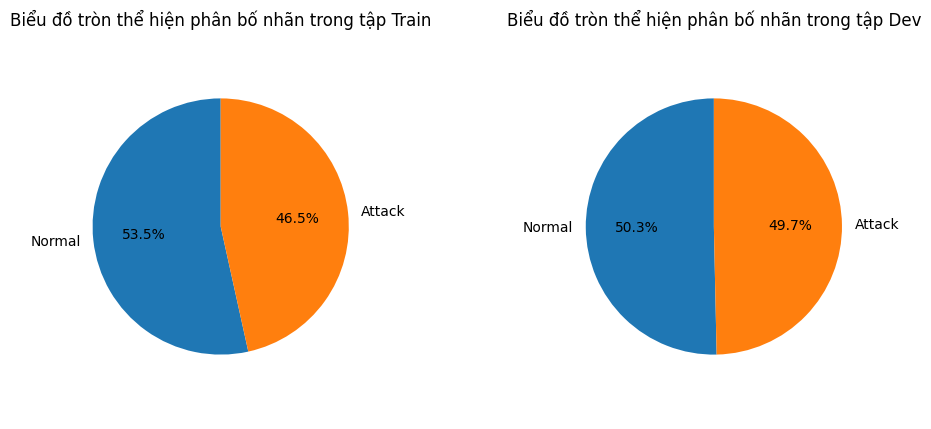

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ pie tập train
axs[0].pie(values_pie_train, labels=keys_pie, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Biểu đồ tròn thể hiện phân bố nhãn trong tập Train')

# Biểu đồ pie tập dev
axs[1].pie(values_pie_dev, labels=keys_pie, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Biểu đồ tròn thể hiện phân bố nhãn trong tập Dev')



# Đảm bảo đồ thị là hình tròn
axs[0].axis('equal')
axs[1].axis('equal')

plt.subplots_adjust(wspace=0.75)
# Hiển thị đồ thị
plt.show()

##4.CHỌN LỰA ĐẶC TRƯNG


####Correlation giữa các Feartures

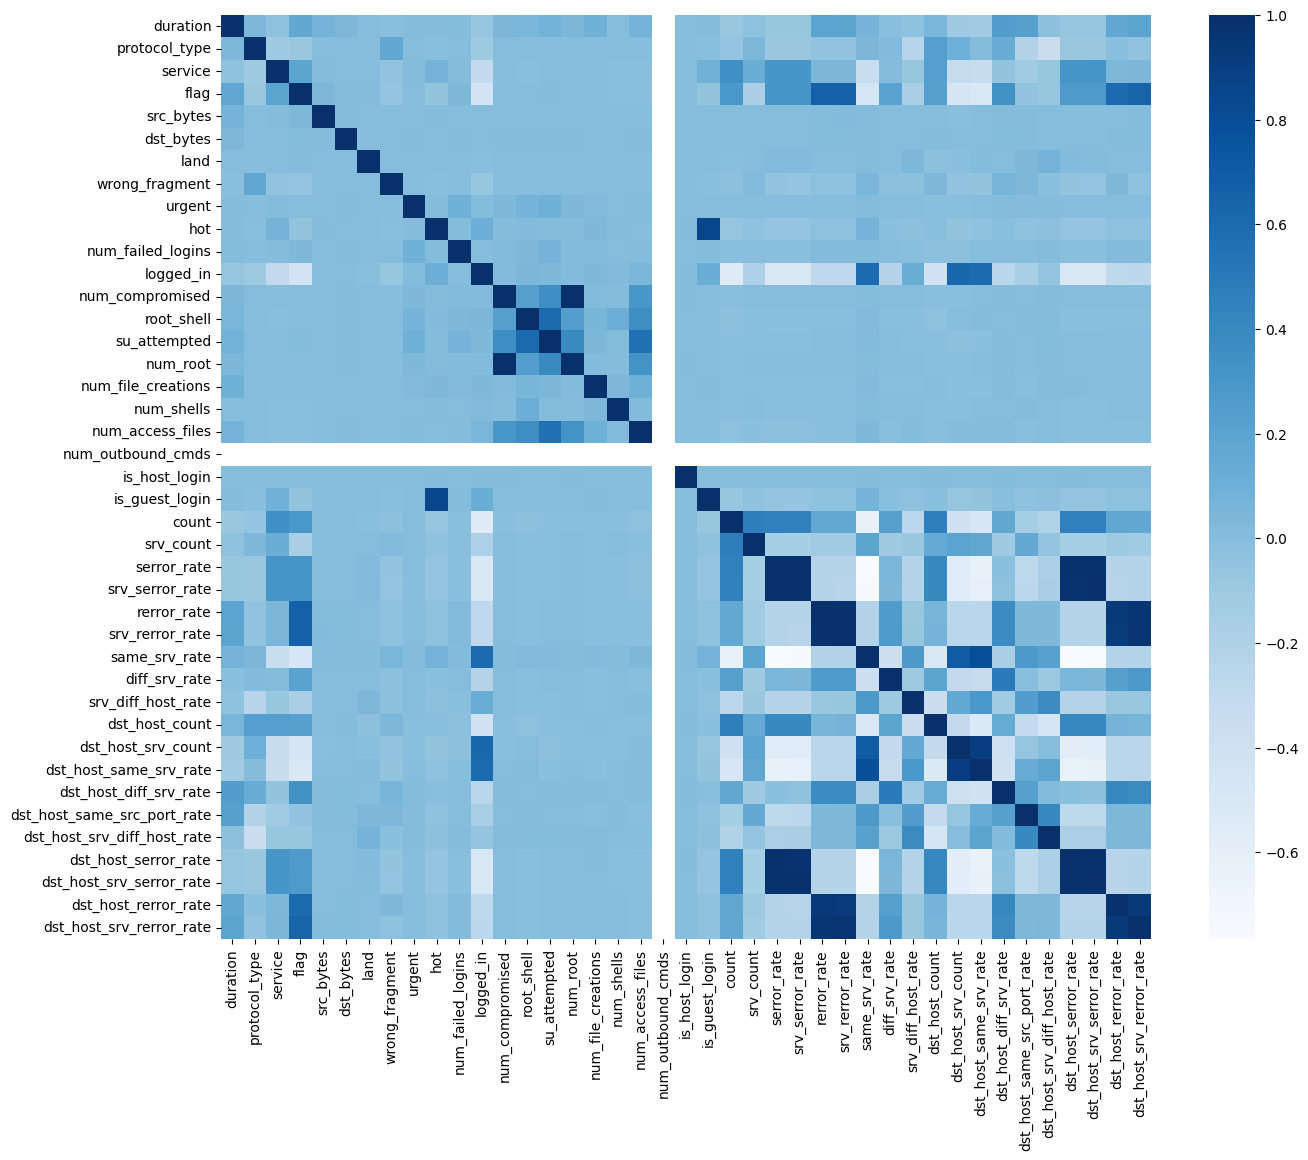

In [ ]:
corr = train_data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap="Blues")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

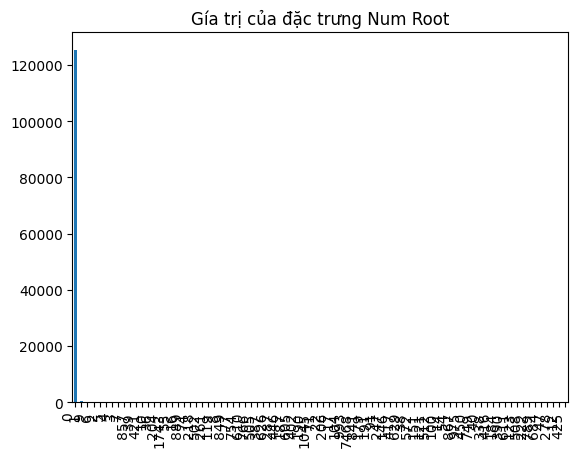

In [ ]:
# trực quan hóa thuộc tính num root
train_data['num_root'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Num Root')
plt.xticks(rotation=90, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

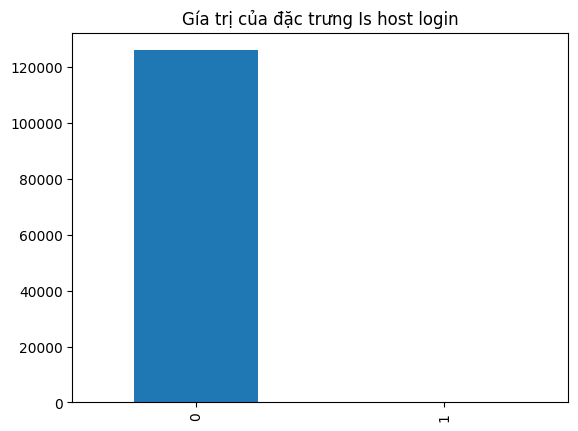

In [ ]:
#trực quan hóa thuộc tinh host login
#kiểm tra xem có đăng nhập vào máy chủ đích
train_data['is_host_login'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Is host login')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

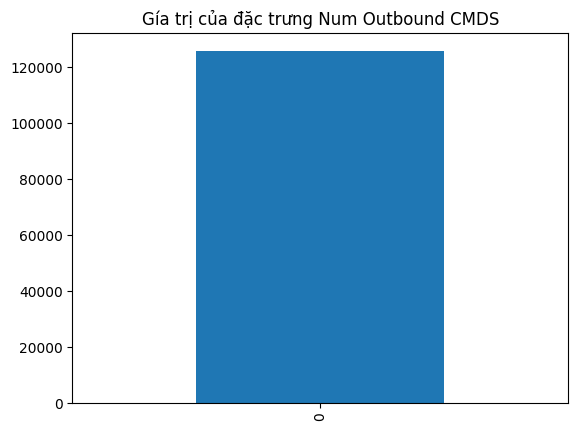

In [ ]:
#trực qua hóa thuộc tính outbound CMDS
#Số lệnh được gửi đi
train_data['num_outbound_cmds'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Num Outbound CMDS')
plt.show

In [ ]:
del train_data['num_outbound_cmds']
del train_data['is_host_login']
del train_data['num_root']

In [ ]:
del dev_data['num_outbound_cmds']
del dev_data['is_host_login']
del dev_data['num_root']

In [ ]:
del test_data['num_outbound_cmds']
del test_data['is_host_login']
del test_data['num_root']

In [ ]:
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

####Random Forest Feature Important

In [ ]:
column_names = train_data.columns
# Giả sử model đã được huấn luyện và feature_importances đã được tính
model = RandomForestClassifier()
model.fit(train_data, train_label)
feature_importances = model.feature_importances_

# Tạo một danh sách các cặp (tên thuộc tính, giá trị độ quan trọng)
feature_importance_pairs = list(zip(column_names, feature_importances*100))

# Sắp xếp danh sách theo giá trị độ quan trọng giảm dần
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

sorted_feature_importance

[('src_bytes', 20.56080268087231),
 ('same_srv_rate', 10.532840441611443),
 ('dst_bytes', 9.834430987127968),
 ('flag', 7.41846191478555),
 ('dst_host_same_srv_rate', 6.062863243912866),
 ('dst_host_srv_count', 5.735858448727317),
 ('diff_srv_rate', 4.636702503905704),
 ('logged_in', 4.334731458420215),
 ('dst_host_diff_srv_rate', 3.3317303644864427),
 ('count', 3.1259170127533373),
 ('dst_host_same_src_port_rate', 3.0905714146221674),
 ('protocol_type', 2.986784494684528),
 ('service', 2.950144438426542),
 ('dst_host_srv_diff_host_rate', 2.3211833377482325),
 ('srv_count', 1.8110397683458304),
 ('dst_host_serror_rate', 1.8067200607930343),
 ('dst_host_count', 1.8007385787721364),
 ('srv_serror_rate', 1.6110229216328522),
 ('hot', 0.8658095476772096),
 ('dst_host_rerror_rate', 0.8423879326384694),
 ('dst_host_srv_serror_rate', 0.7912383360616457),
 ('num_compromised', 0.6194448841718789),
 ('dst_host_srv_rerror_rate', 0.5484747198833788),
 ('wrong_fragment', 0.52324414617549),
 ('rerro

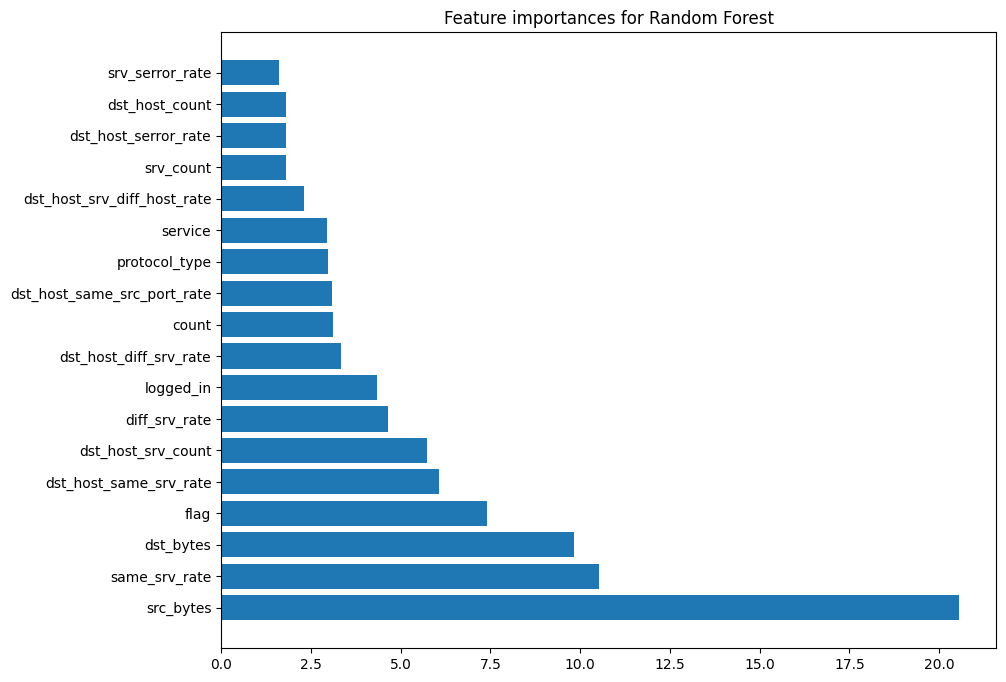

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.figure(figsize=(10,8))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Feature importances for Random Forest')
    plt.show()

features_names = train_data
f_importances(abs(model.feature_importances_*100), features_names, top=18)

**Xgboost Feature Important**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

column_names = train_data.columns
# Giả sử model đã được huấn luyện và feature_importances đã được tính
model = xgb.XGBClassifier()
model.fit(train_data, train_label)
feature_importances = model.feature_importances_

# Tạo một danh sách các cặp (tên thuộc tính, giá trị độ quan trọng)
feature_importance_pairs = list(zip(column_names, feature_importances*100))

# Sắp xếp danh sách theo giá trị độ quan trọng giảm dần
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

sorted_feature_importance

[('src_bytes', 35.585766),
 ('hot', 9.727166),
 ('srv_count', 7.1658516),
 ('count', 6.827754),
 ('dst_host_srv_rerror_rate', 5.5805154),
 ('service', 5.2930856),
 ('dst_host_srv_count', 4.7807703),
 ('dst_host_same_src_port_rate', 4.3536906),
 ('protocol_type', 3.2836378),
 ('dst_bytes', 2.7892935),
 ('logged_in', 2.1861367),
 ('wrong_fragment', 1.9739625),
 ('dst_host_same_srv_rate', 1.6350439),
 ('diff_srv_rate', 1.203301),
 ('dst_host_srv_diff_host_rate', 1.0420198),
 ('dst_host_serror_rate', 0.9205779),
 ('dst_host_rerror_rate', 0.74730533),
 ('dst_host_srv_serror_rate', 0.73835903),
 ('duration', 0.7105513),
 ('dst_host_diff_srv_rate', 0.41490948),
 ('rerror_rate', 0.3899793),
 ('root_shell', 0.3003726),
 ('serror_rate', 0.2960459),
 ('dst_host_count', 0.24488594),
 ('srv_rerror_rate', 0.23014368),
 ('srv_diff_host_rate', 0.22477363),
 ('num_file_creations', 0.21612157),
 ('same_srv_rate', 0.1864838),
 ('num_shells', 0.16555251),
 ('flag', 0.16299818),
 ('num_access_files', 0.137

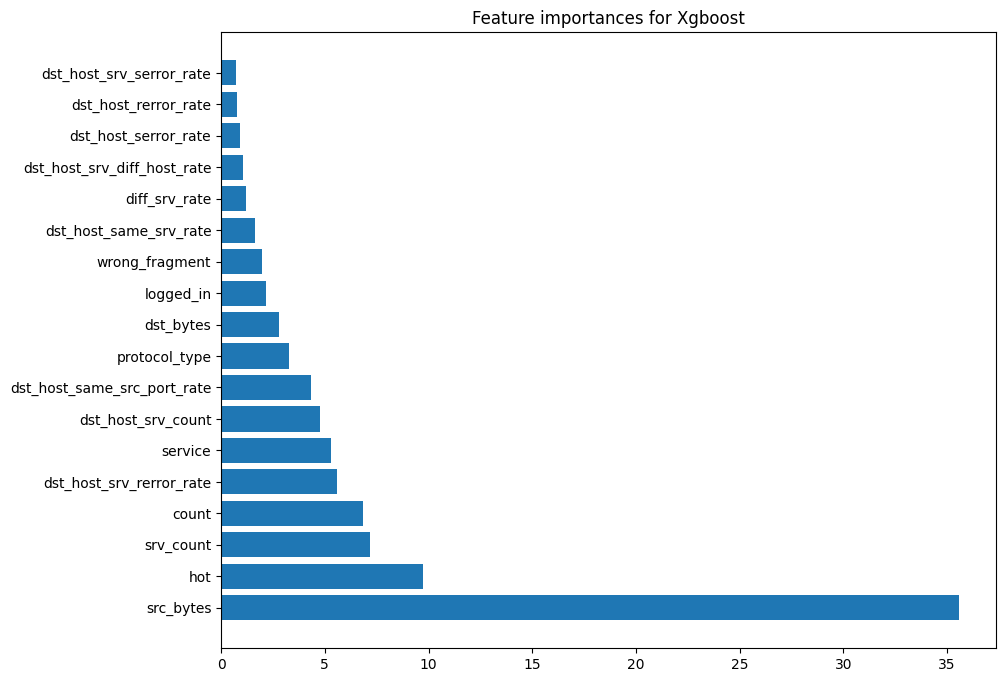

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.figure(figsize=(10,8))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Feature importances for Xgboost')
    plt.show()

features_names = train_data
f_importances(abs(model.feature_importances_*100), features_names, top=18)

**Correlation Label**

In [ ]:
correlations = train_data.corrwith(train_label)
sorted_correlations = correlations.sort_values(ascending=False)
print(sorted_correlations)

dst_host_srv_serror_rate       0.654985
dst_host_serror_rate           0.651842
serror_rate                    0.650652
srv_serror_rate                0.648289
count                          0.576444
flag                           0.496916
dst_host_count                 0.375052
service                        0.325663
srv_rerror_rate                0.253504
dst_host_srv_rerror_rate       0.253430
rerror_rate                    0.253397
dst_host_rerror_rate           0.252563
dst_host_diff_srv_rate         0.242898
diff_srv_rate                  0.203660
wrong_fragment                 0.095905
dst_host_same_src_port_rate    0.092444
dst_host_srv_diff_host_rate    0.062332
duration                       0.048785
land                           0.007191
src_bytes                      0.005921
dst_bytes                      0.004118
srv_count                      0.000771
urgent                        -0.002787
num_failed_logins             -0.003755
num_shells                    -0.009472


**Feature Choosing**



> Feature Explanation


1.   Src_bytes: Số byte được gửi từ máy chủ nguồn sang máy chủ đích.
2.   Dst_bytes: ố byte được gửi từ máy chủ đích sang máy chủ nguồn.
3.   Protocol_type: Loại giao thức được sử dụng trong một kết nối. Ví dụ: TCP, UDP, ICMP, ...
4.   Flag: Các cờ được sử dụng trong một gói tin. Ví dụ: SYN, ACK, FIN, ...
5.   Dst_host_srv_rerror_rate: Tỷ lệ các kết nối đến cùng một dịch vụ trên cùng một máy chủ đích bị từ chối.
6.   Hot: Chỉ ra liệu kết nối có được sử dụng nhiều hay không.
7.   Logged_in: Chỉ ra liệu người dùng đã đăng nhập thành công hay không.
8.   Dst_host_same_srv_rate: Tỷ lệ các kết nối đến cùng một dịch vụ trên cùng một máy chủ đích.
9.   Dst_host_serror_rate: Tỷ lệ các kết nối đến cùng một máy chủ đích bị lỗi.
10.  Same_srv_rate: Tỷ lệ các kết nối đến cùng một dịch vụ.







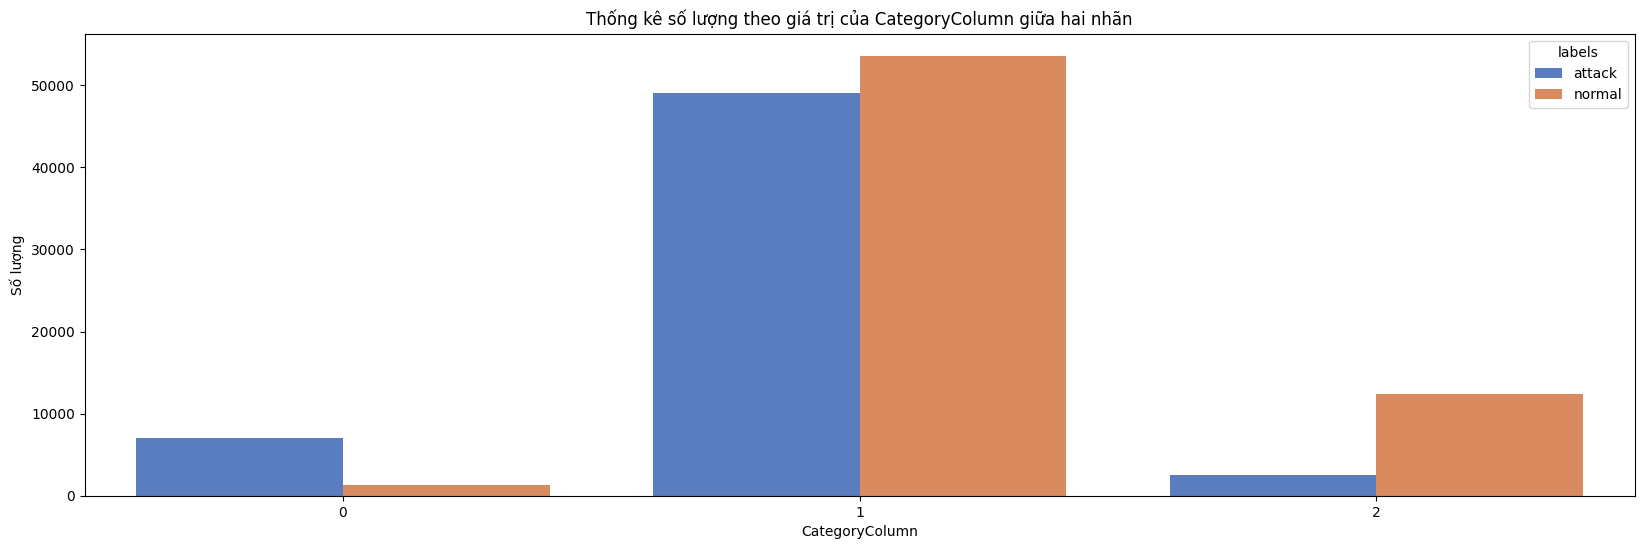

In [ ]:
#protocol type
count_df = train_df.groupby(['protocol_type', 'labels']).size().reset_index(name='Count')
train_df['Index'] = range(1, len(train_df) + 1)
# Tạo biểu đồ cột
plt.figure(figsize=(20, 6))
sns.barplot(x='protocol_type', y='Count', hue='labels', data=count_df, palette='muted')
plt.title('Thống kê số lượng theo giá trị của CategoryColumn giữa hai nhãn')
plt.xlabel('CategoryColumn')
plt.ylabel('Số lượng')
plt.show()

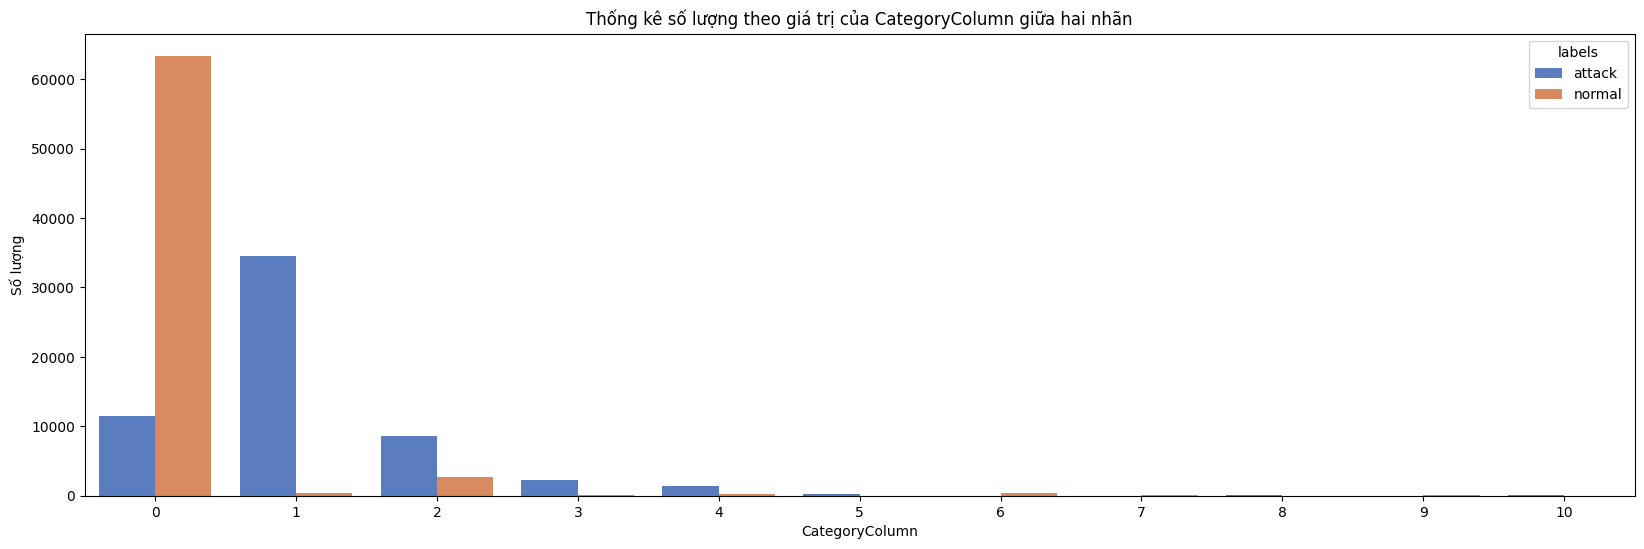

In [ ]:
#flag type
count_df = train_df.groupby(['flag', 'labels']).size().reset_index(name='Count')

# Tạo biểu đồ cột
plt.figure(figsize=(20, 6))
sns.barplot(x='flag', y='Count', hue='labels', data=count_df, palette='muted')
plt.title('Thống kê số lượng theo giá trị của CategoryColumn giữa hai nhãn')
plt.xlabel('CategoryColumn')
plt.ylabel('Số lượng')
plt.show()

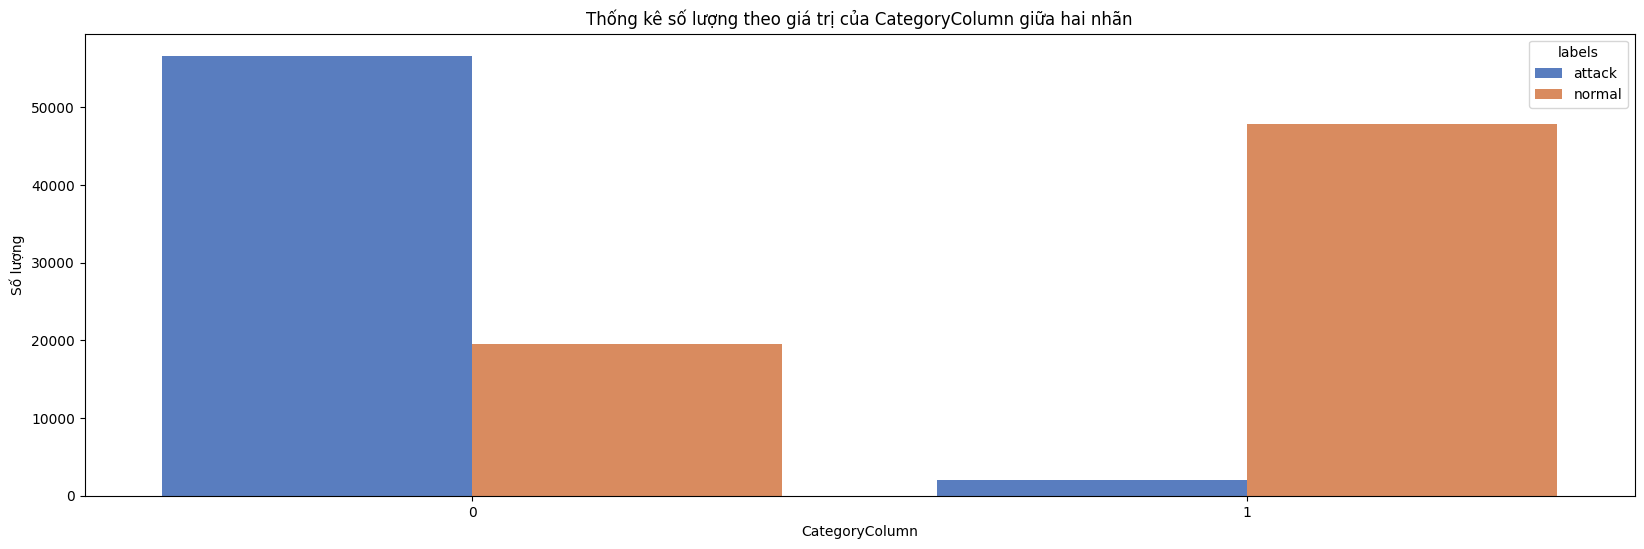

In [ ]:
count_df = train_df.groupby(['logged_in', 'labels']).size().reset_index(name='Count')

# Tạo biểu đồ cột
plt.figure(figsize=(20, 6))
sns.barplot(x='logged_in', y='Count', hue='labels', data=count_df, palette='muted')
plt.title('Thống kê số lượng theo giá trị của CategoryColumn giữa hai nhãn')
plt.xlabel('CategoryColumn')
plt.ylabel('Số lượng')
plt.show()

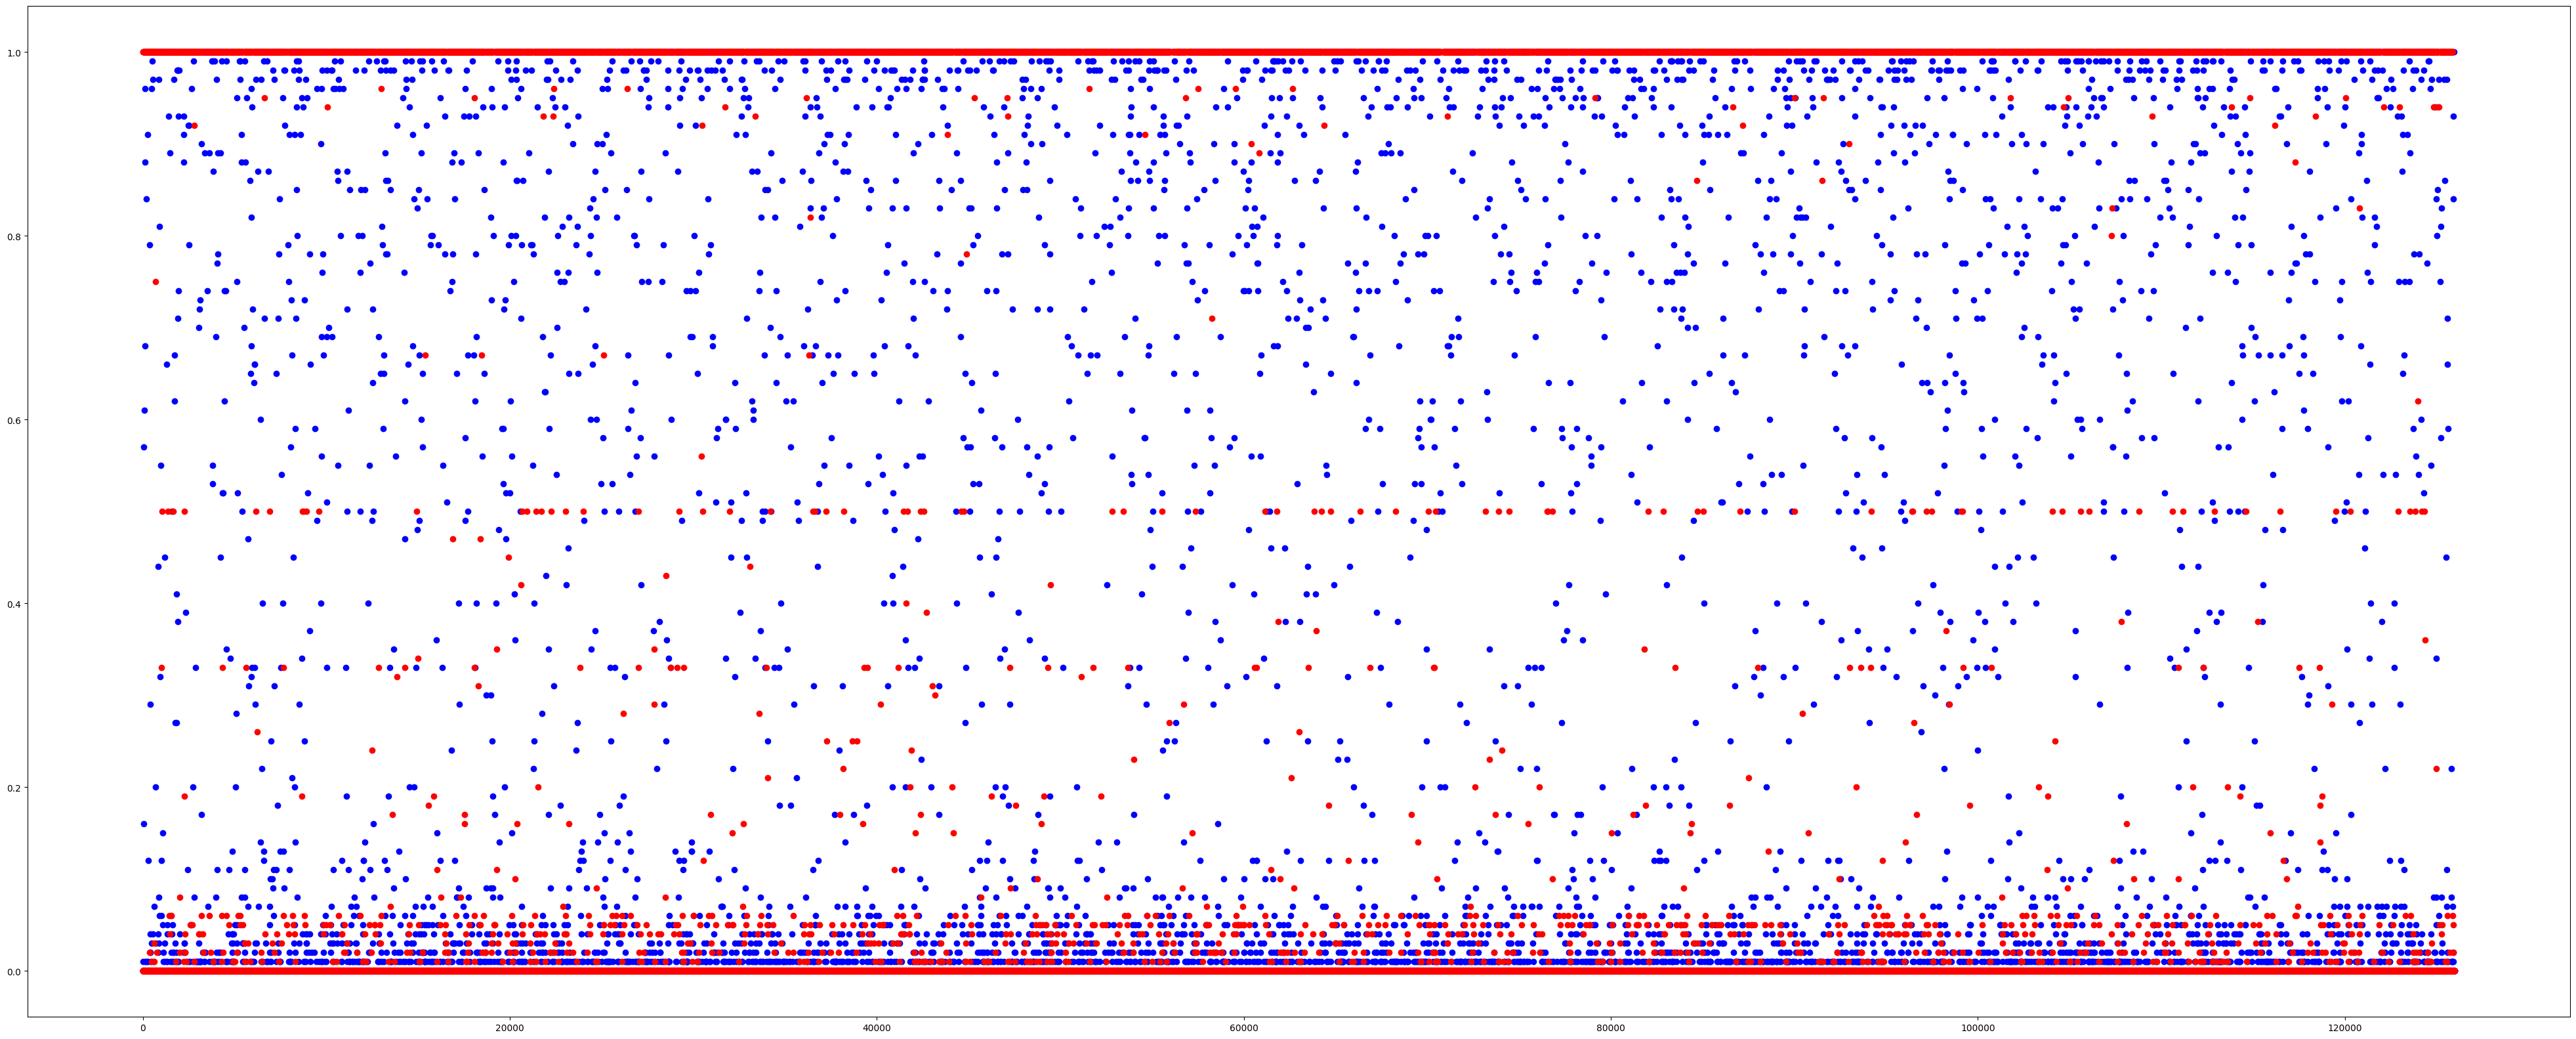

In [ ]:
plt.figure(figsize=(50, 20))
plt.scatter(train_df.loc[train_df['labels'] == 'normal', 'Index'], train_df.loc[train_df['labels'] == 'normal', 'dst_host_srv_rerror_rate'], c='blue', label='Normal')
plt.scatter(train_df.loc[train_df['labels'] == 'attack', 'Index'], train_df.loc[train_df['labels'] == 'attack', 'dst_host_srv_rerror_rate'], c='red', label='attack')
plt.show()

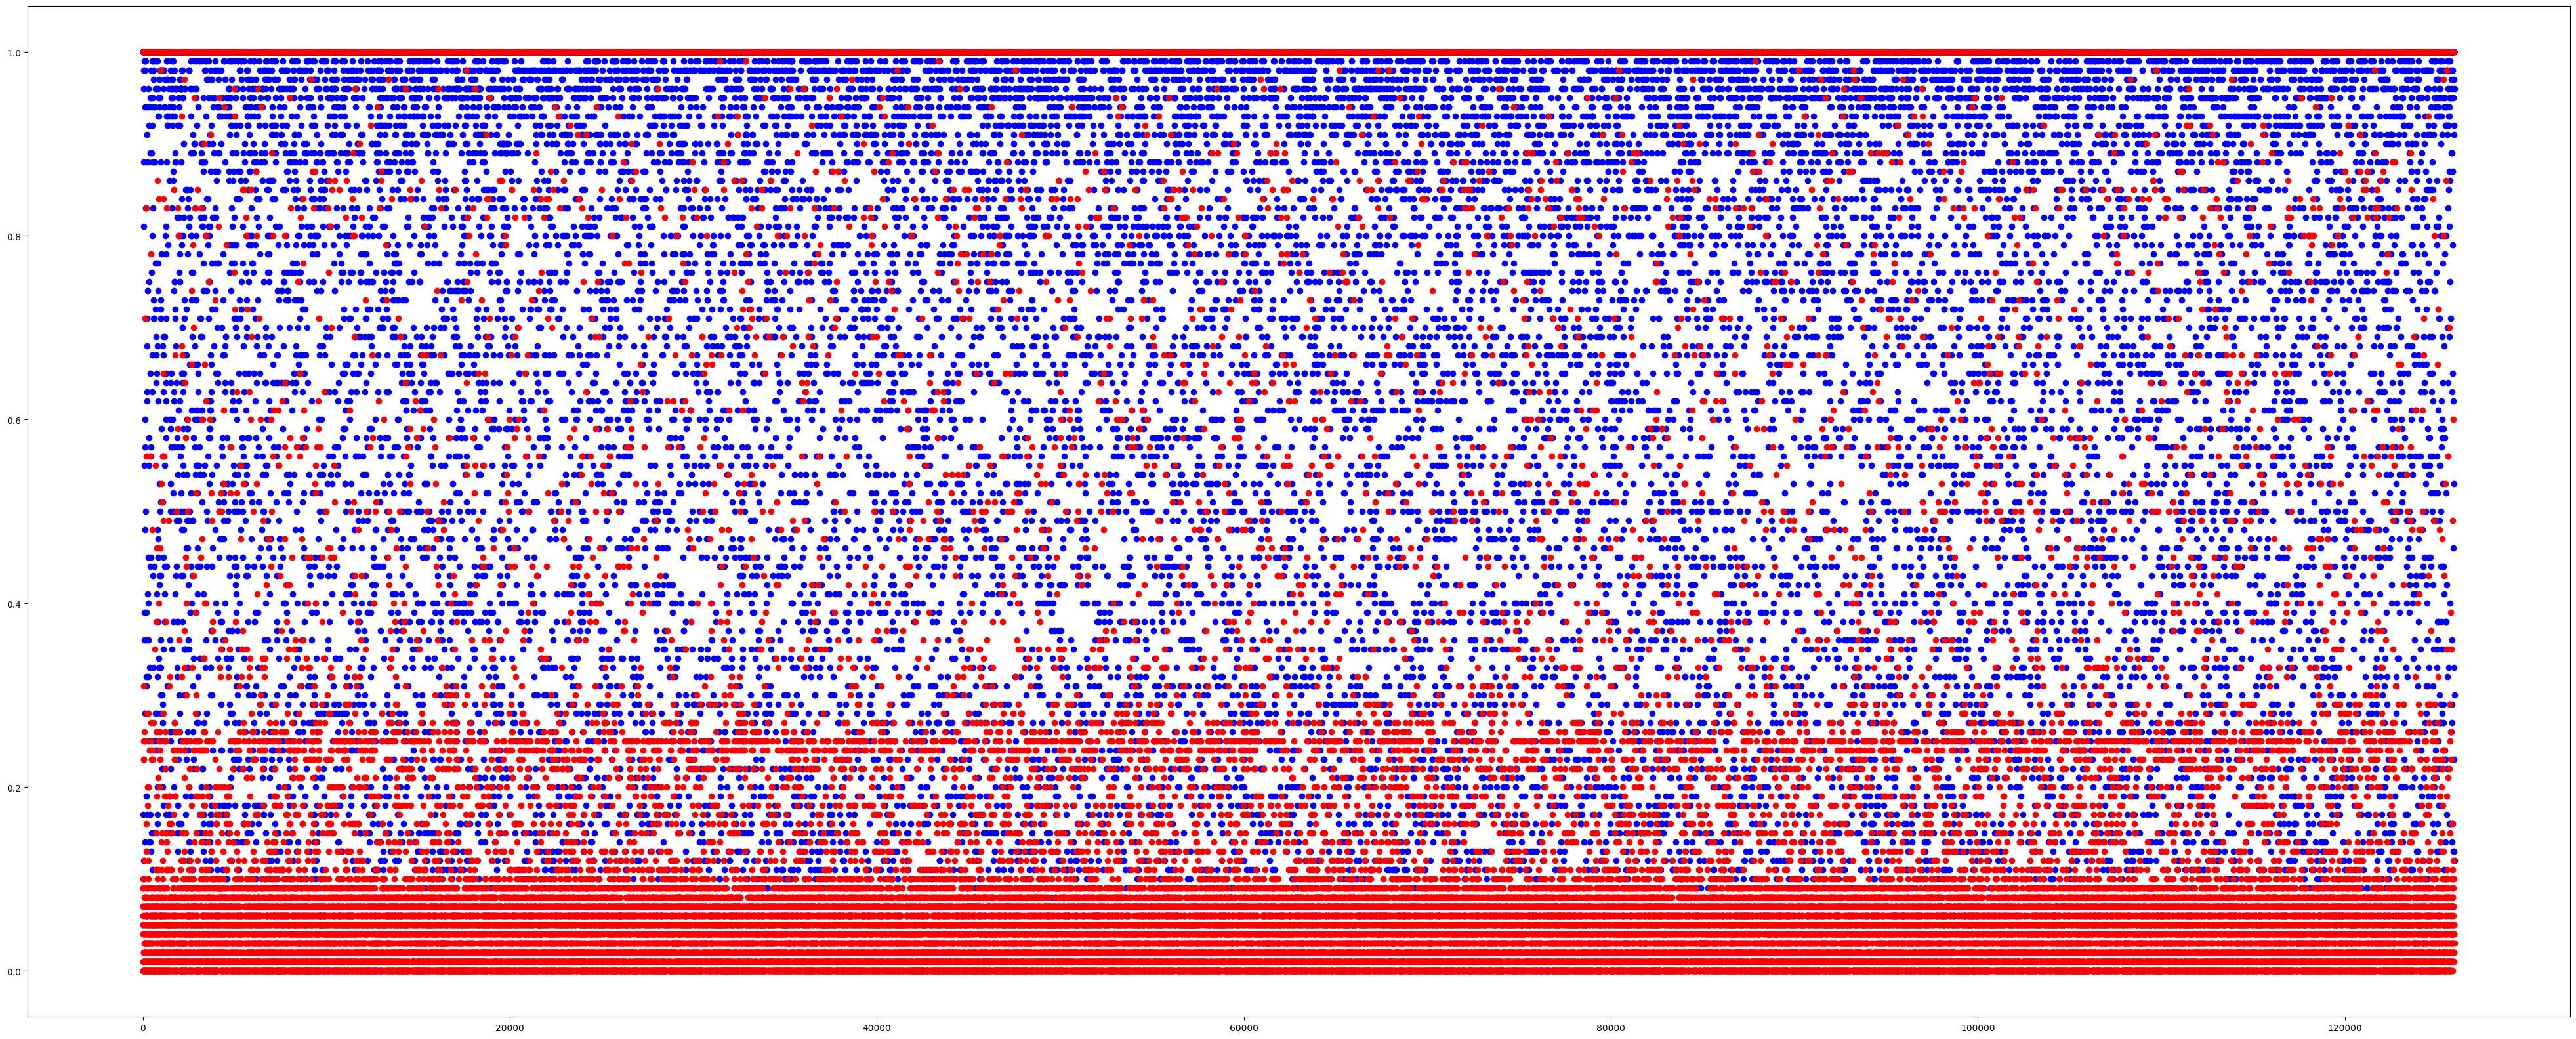

In [ ]:
plt.figure(figsize=(50, 20))
plt.scatter(train_df.loc[train_df['labels'] == 'normal', 'Index'], train_df.loc[train_df['labels'] == 'normal', 'dst_host_same_srv_rate'], c='blue', label='Normal')
plt.scatter(train_df.loc[train_df['labels'] == 'attack', 'Index'], train_df.loc[train_df['labels'] == 'attack', 'dst_host_same_srv_rate'], c='red', label='attack')
plt.show()

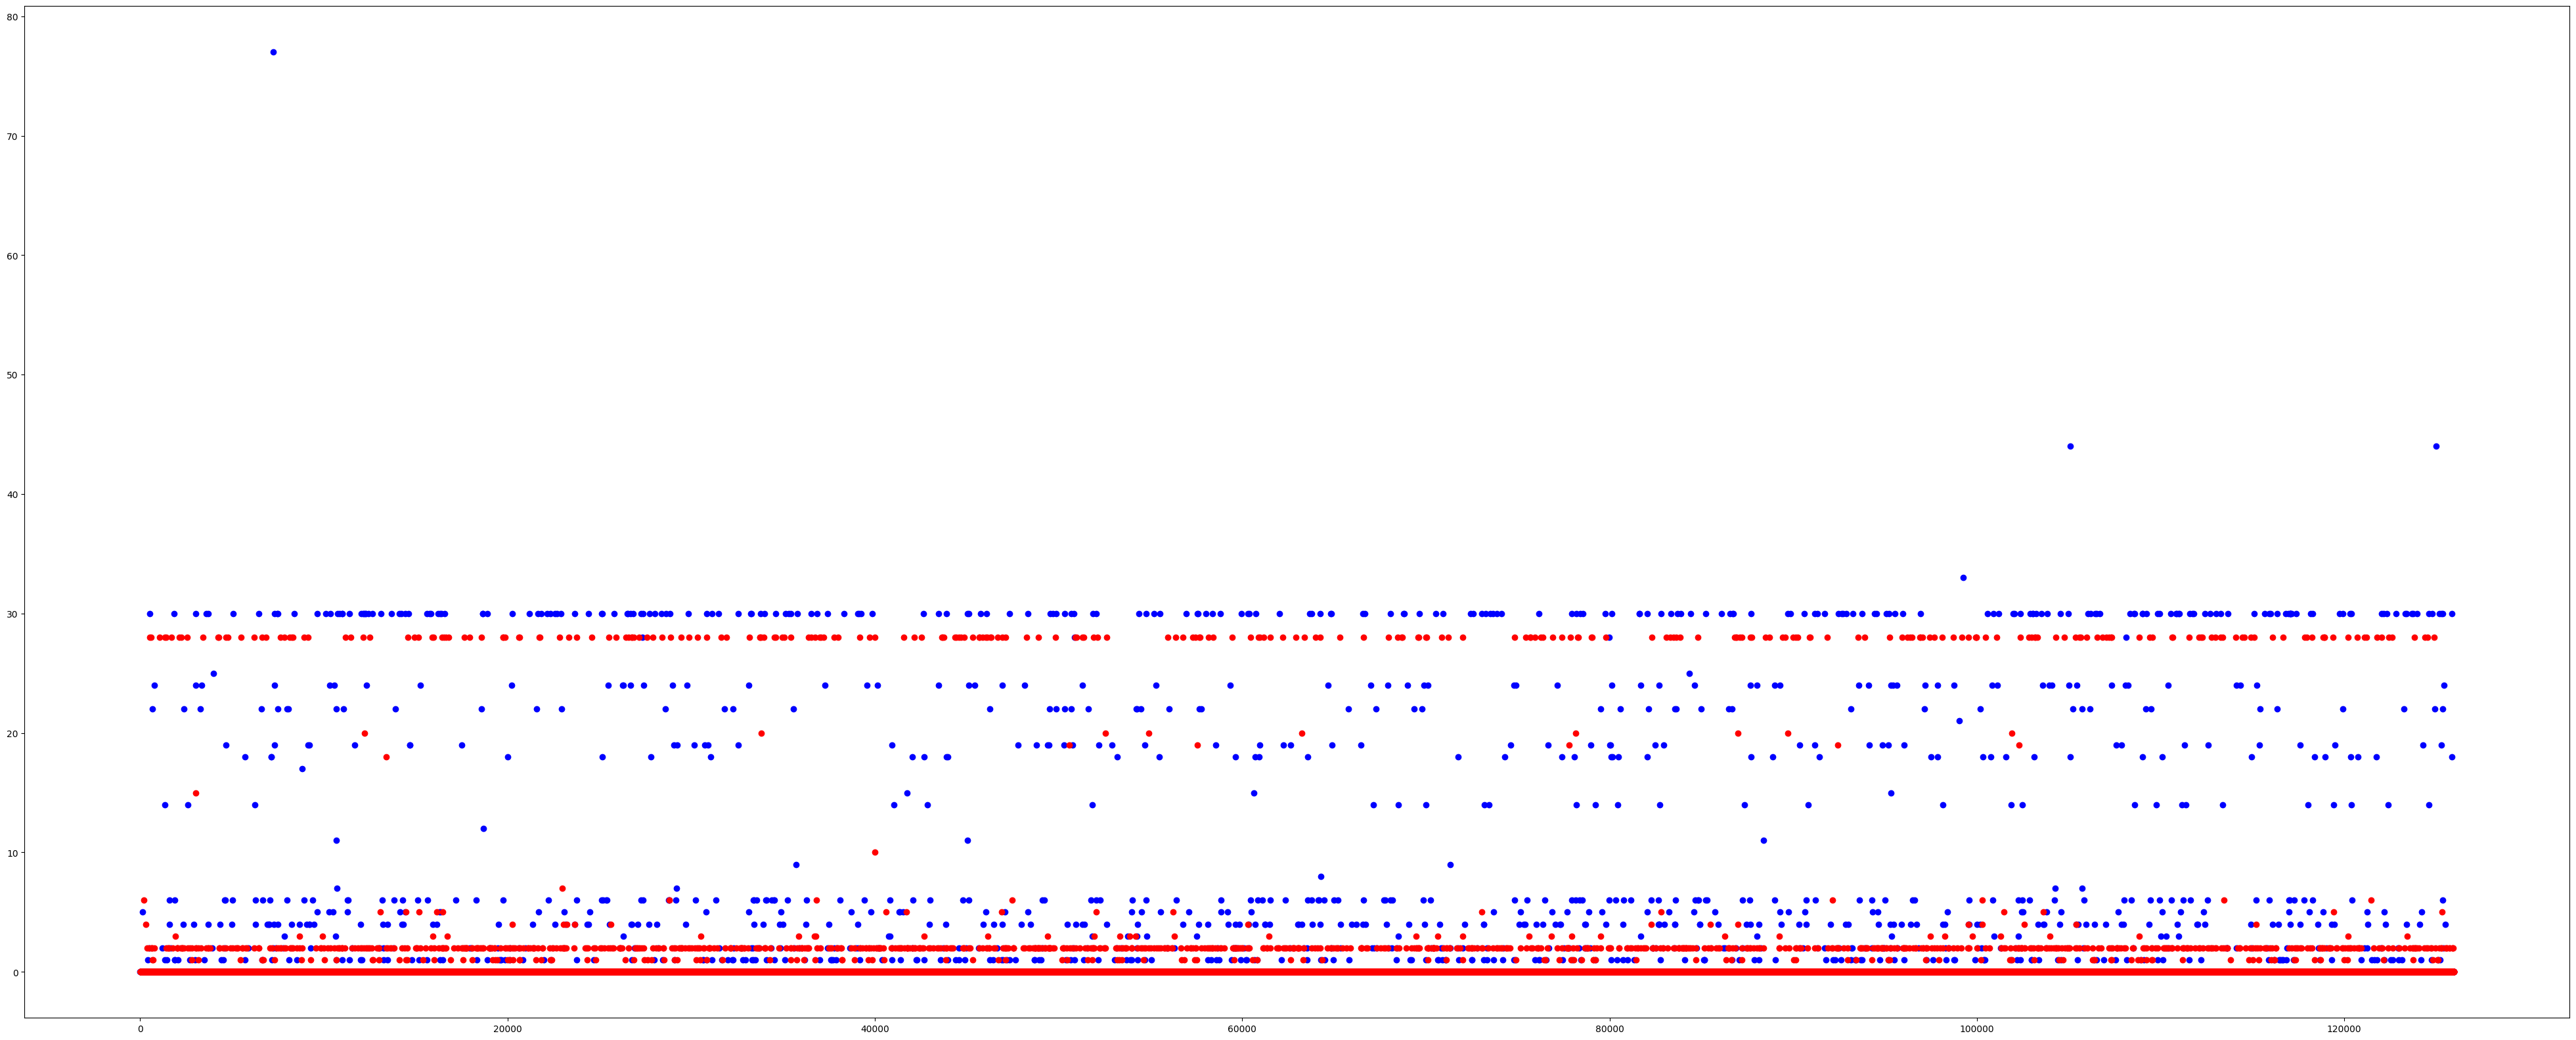

In [ ]:
plt.figure(figsize=(50, 20))
plt.scatter(train_df.loc[train_df['labels'] == 'normal', 'Index'], train_df.loc[train_df['labels'] == 'normal', 'hot'], c='blue', label='Normal')
plt.scatter(train_df.loc[train_df['labels'] == 'attack', 'Index'], train_df.loc[train_df['labels'] == 'attack', 'hot'], c='red', label='attack')
plt.show()

In [ ]:
X_train = train_data[['src_bytes','dst_bytes','protocol_type','flag','dst_host_srv_rerror_rate','hot','logged_in','dst_host_same_srv_rate','dst_host_serror_rate','same_srv_rate']]
y_train = train_label

In [ ]:
X_dev = dev_data[['src_bytes','dst_bytes','protocol_type','flag','dst_host_srv_rerror_rate','hot','logged_in','dst_host_same_srv_rate','dst_host_serror_rate','same_srv_rate']]
y_dev = dev_label

In [ ]:
X_test = test_data[['src_bytes','dst_bytes','protocol_type','flag','dst_host_srv_rerror_rate','hot','logged_in','dst_host_same_srv_rate','dst_host_serror_rate','same_srv_rate']]
y_test = test_label

##5.Model

###5.1. Logistic Regression

####5.1.1. Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_lr = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 10),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'fit_intercept': [True, False]
}

model_lr = GridSearchCV(model_lr, param_grid, cv=5, scoring='accuracy')
model_lr.fit(X_train, y_train)
print("Best parameters found: ", model_lr.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 0.046415888336127774, 'fit_intercept': True, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}


####5.1.2.Evaluate Dev Dataframe & Confuse Matrix

In [ ]:
#tinh chinh tham so
from sklearn.metrics import accuracy_score
y_pred_dev_lr = model_lr.predict(X_dev)
accuracy_lr = accuracy_score(y_dev, y_pred_dev_lr)
accuracy_lr

0.8975382568196939

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
class_report_lr = classification_report(y_dev, y_pred_dev_lr)
print("Classification Report:")
print(class_report_lr)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2239
           1       0.95      0.84      0.89      2270

    accuracy                           0.90      4509
   macro avg       0.90      0.90      0.90      4509
weighted avg       0.90      0.90      0.90      4509



0.8972248370424312

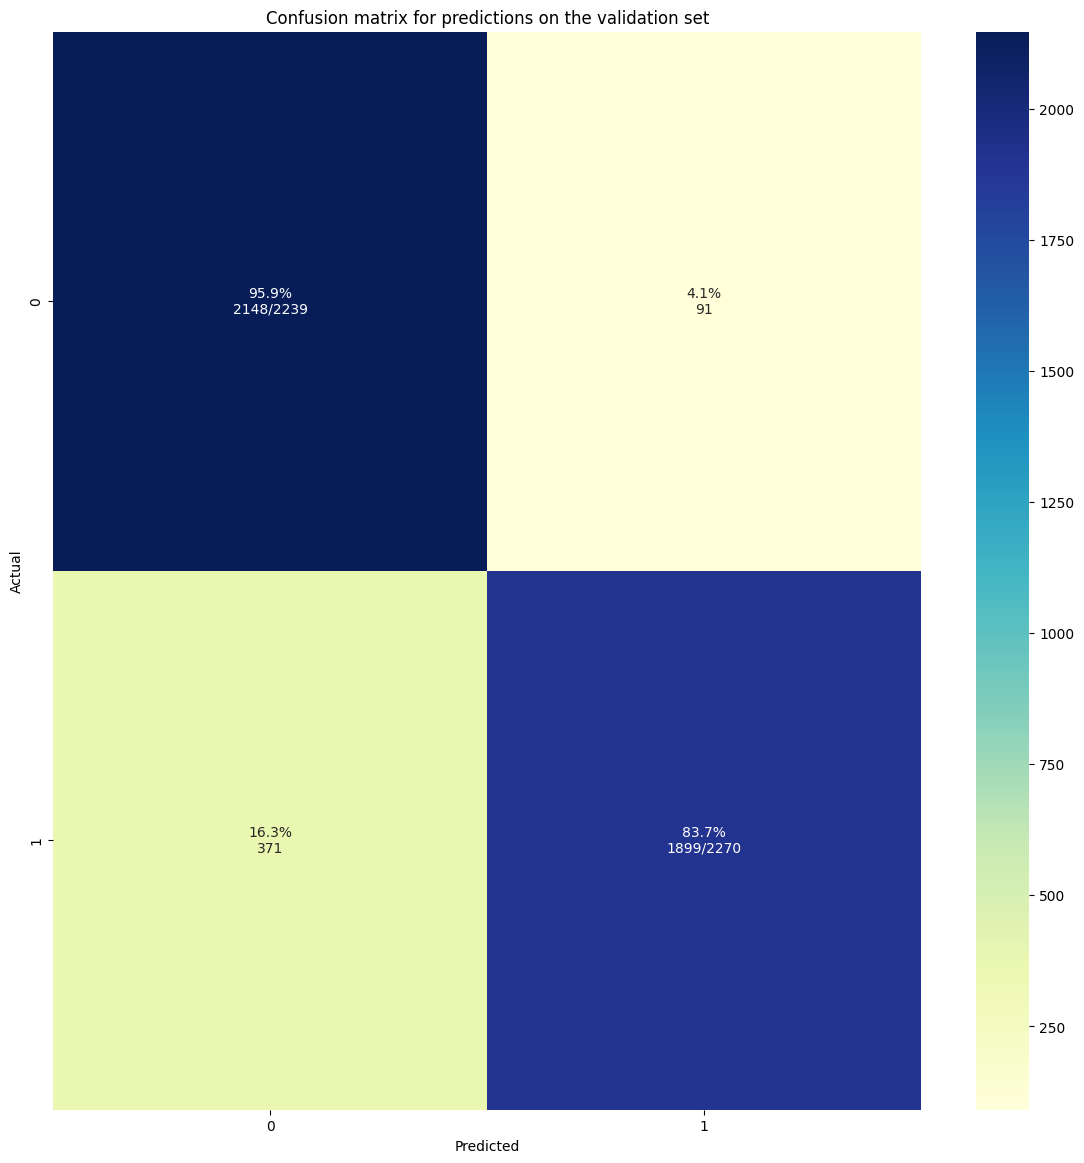

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
plot_cm(y_dev,y_pred_dev_lr, 'Confusion matrix for predictions on the validation set')
f1_score(y_dev, y_pred_dev_lr, average = 'macro')

####5.1.3. Evaluate Test Dataframe & Confuse Matrix

In [ ]:
#tinh chinh tham so
from sklearn.metrics import accuracy_score
y_pred_test_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
accuracy_lr

0.9008594399778209

In [ ]:
X_train.shape

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
class_report_test_lr = classification_report(y_test, y_pred_test_lr)
print("Classification Report:")
print(class_report_test_lr)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      9006
           1       0.96      0.84      0.89      9029

    accuracy                           0.90     18035
   macro avg       0.91      0.90      0.90     18035
weighted avg       0.91      0.90      0.90     18035



0.9004735480078376

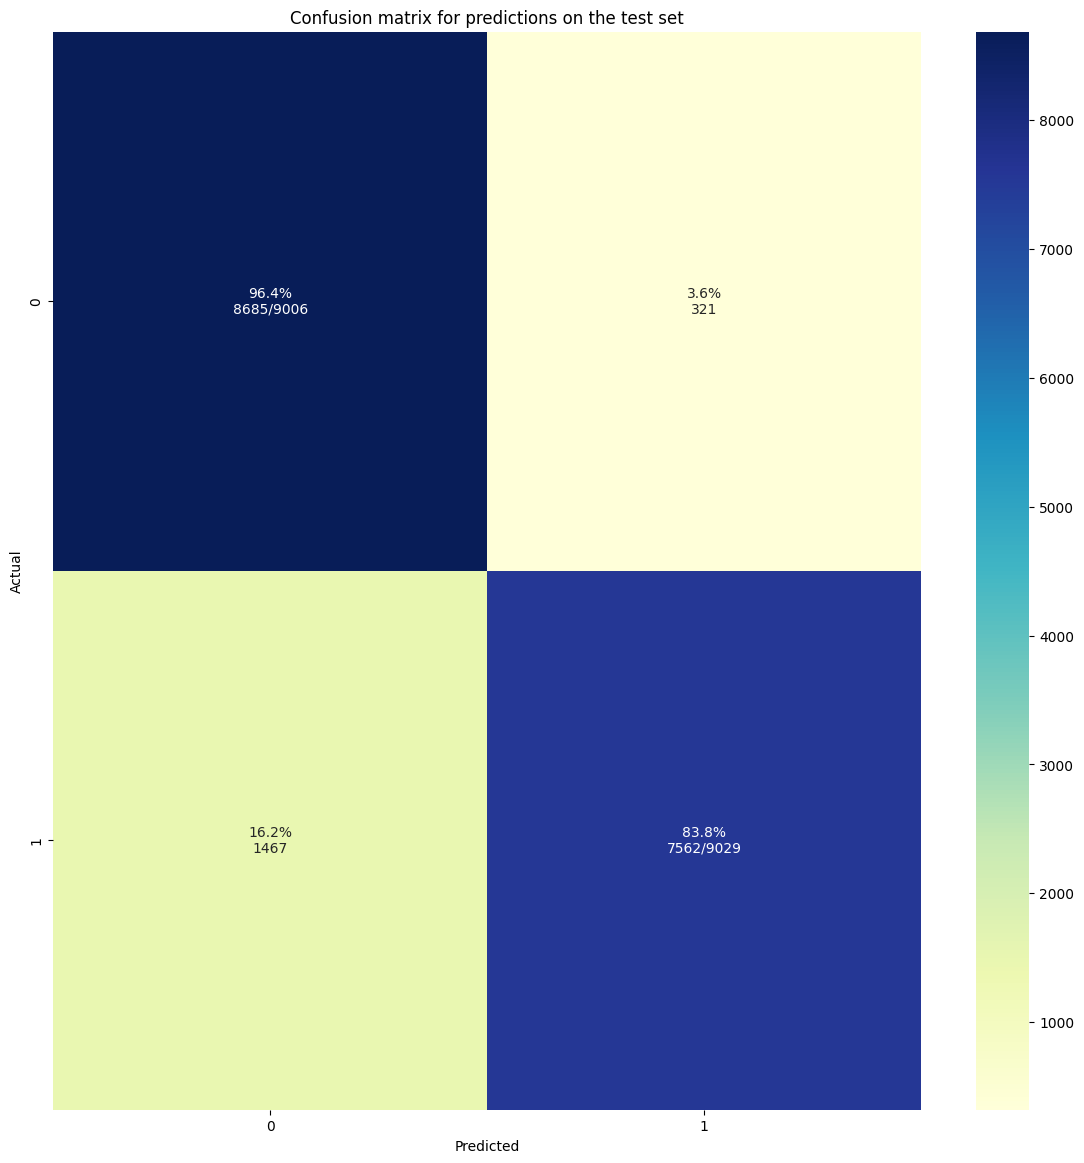

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
plot_cm(y_test,y_pred_test_lr, 'Confusion matrix for predictions on the test set')
f1_score(y_test, y_pred_test_lr, average = 'macro')

###5.2. Xgboost

####5.2.1. Train Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}

model_xgb = XGBClassifier()

model_xgb = GridSearchCV(model_xgb, param_grid, cv=5, scoring='accuracy')
model_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1, 5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
print("Best parameters found: ", model_xgb.best_params_)

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}


####5.2.2. Evaluate Dev Dataframe & Confuse Matrix

In [ ]:
#tinh chinh tham so
from sklearn.metrics import accuracy_score
y_pred_dev_xgb = model_xgb.predict(X_dev)
accuracy_lr = accuracy_score(y_dev, y_pred_dev_xgb)
accuracy_lr

0.9321357285429142

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
class_report_xgb = classification_report(y_dev, y_pred_dev_xgb)
print("Classification Report:")
print(class_report_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2239
           1       0.99      0.88      0.93      2270

    accuracy                           0.93      4509
   macro avg       0.94      0.93      0.93      4509
weighted avg       0.94      0.93      0.93      4509



0.9319602300746007

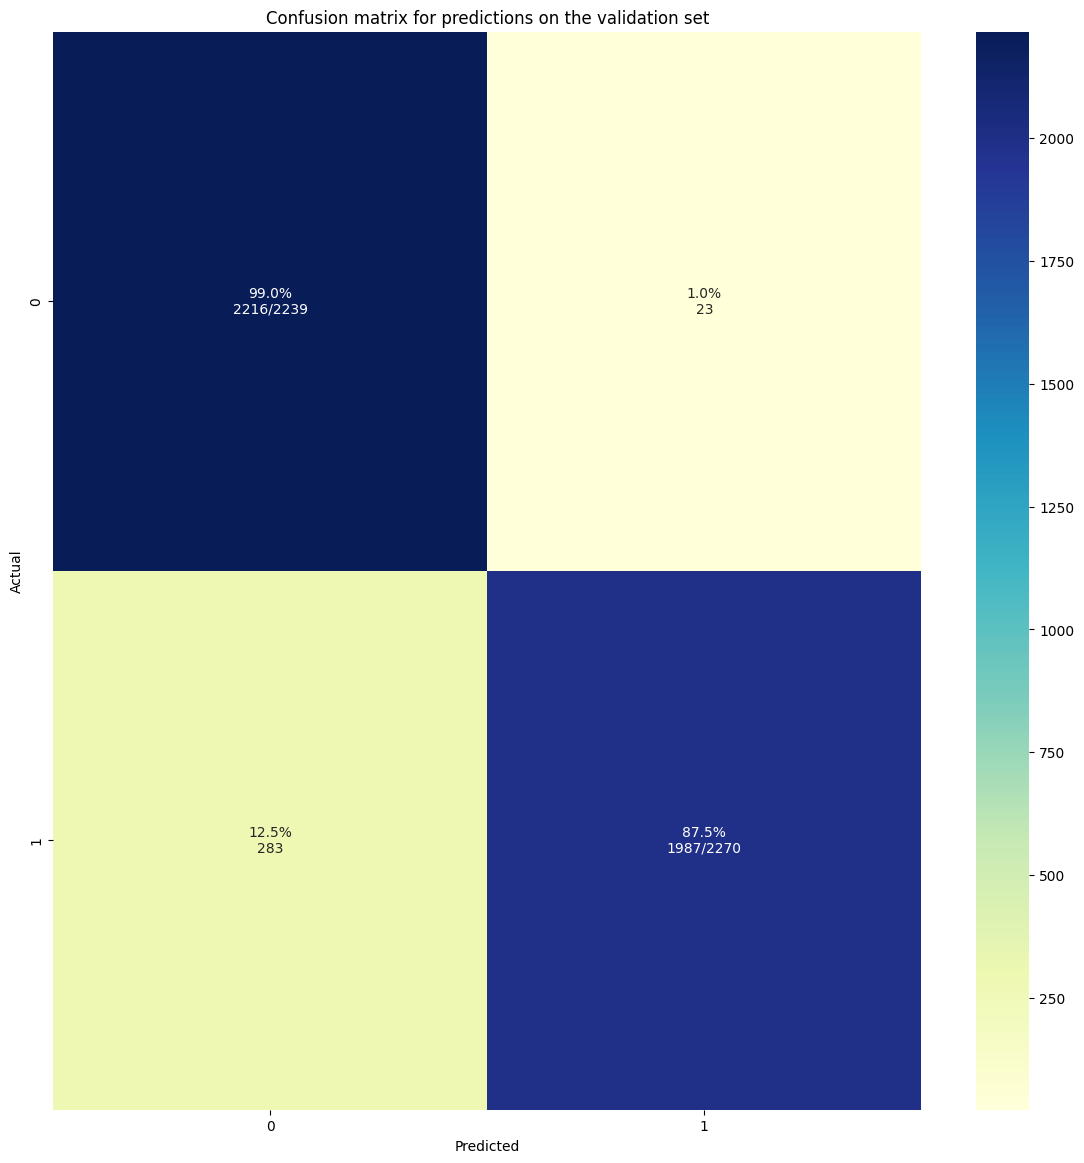

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
plot_cm(y_dev,y_pred_dev_xgb, 'Confusion matrix for predictions on the validation set')
f1_score(y_dev, y_pred_dev_xgb, average = 'macro')

####5.2.3. Evaluate Test Dataframe & Confuse Matrix

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_xgb = model_xgb.predict(X_test)
accuracy_test_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_test_xgb

0.9334627113945106

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
class_report_test_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(class_report_test_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9006
           1       0.99      0.88      0.93      9029

    accuracy                           0.93     18035
   macro avg       0.94      0.93      0.93     18035
weighted avg       0.94      0.93      0.93     18035



0.9332571029652499

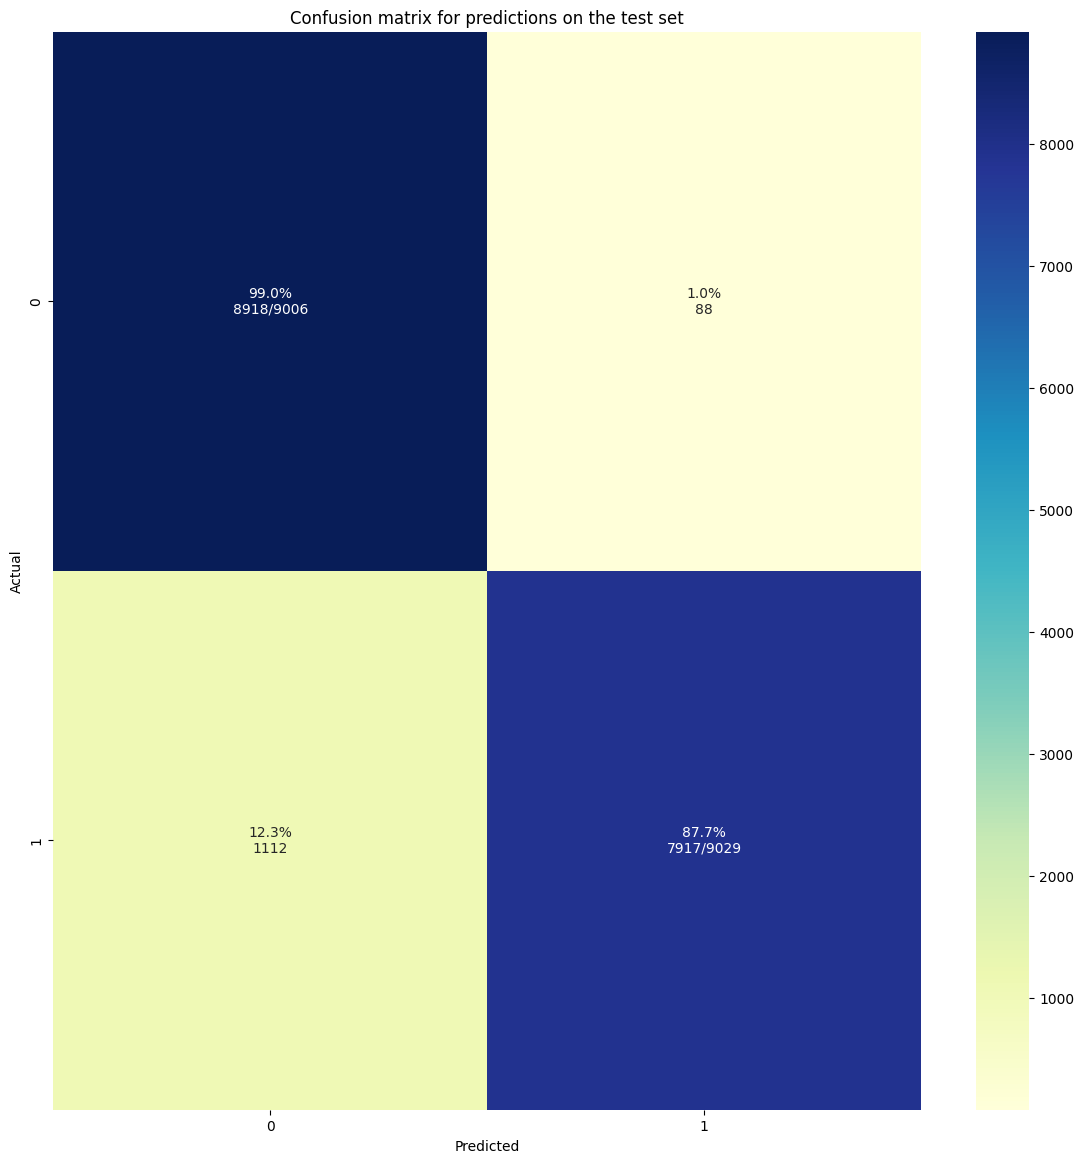

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
plot_cm(y_test, y_pred_xgb, 'Confusion matrix for predictions on the test set')
f1_score(y_test, y_pred_xgb, average = 'macro')

###5.3. Random Forest

####5.3.1. Train model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
print("Best parameters found: ", model.best_params_)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


####5.3.2. Evaluate Dev Dataframe & Confuse Matrix

In [ ]:
#tinh chinh tham so
from sklearn.metrics import accuracy_score
y_pred_dev = model.predict(X_dev)
accuracy = accuracy_score(y_dev, y_pred_dev)
accuracy

0.9321357285429142

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
class_report = classification_report(y_dev, y_pred_dev)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2239
           1       0.99      0.87      0.93      2270

    accuracy                           0.93      4509
   macro avg       0.94      0.93      0.93      4509
weighted avg       0.94      0.93      0.93      4509



0.9319508877948236

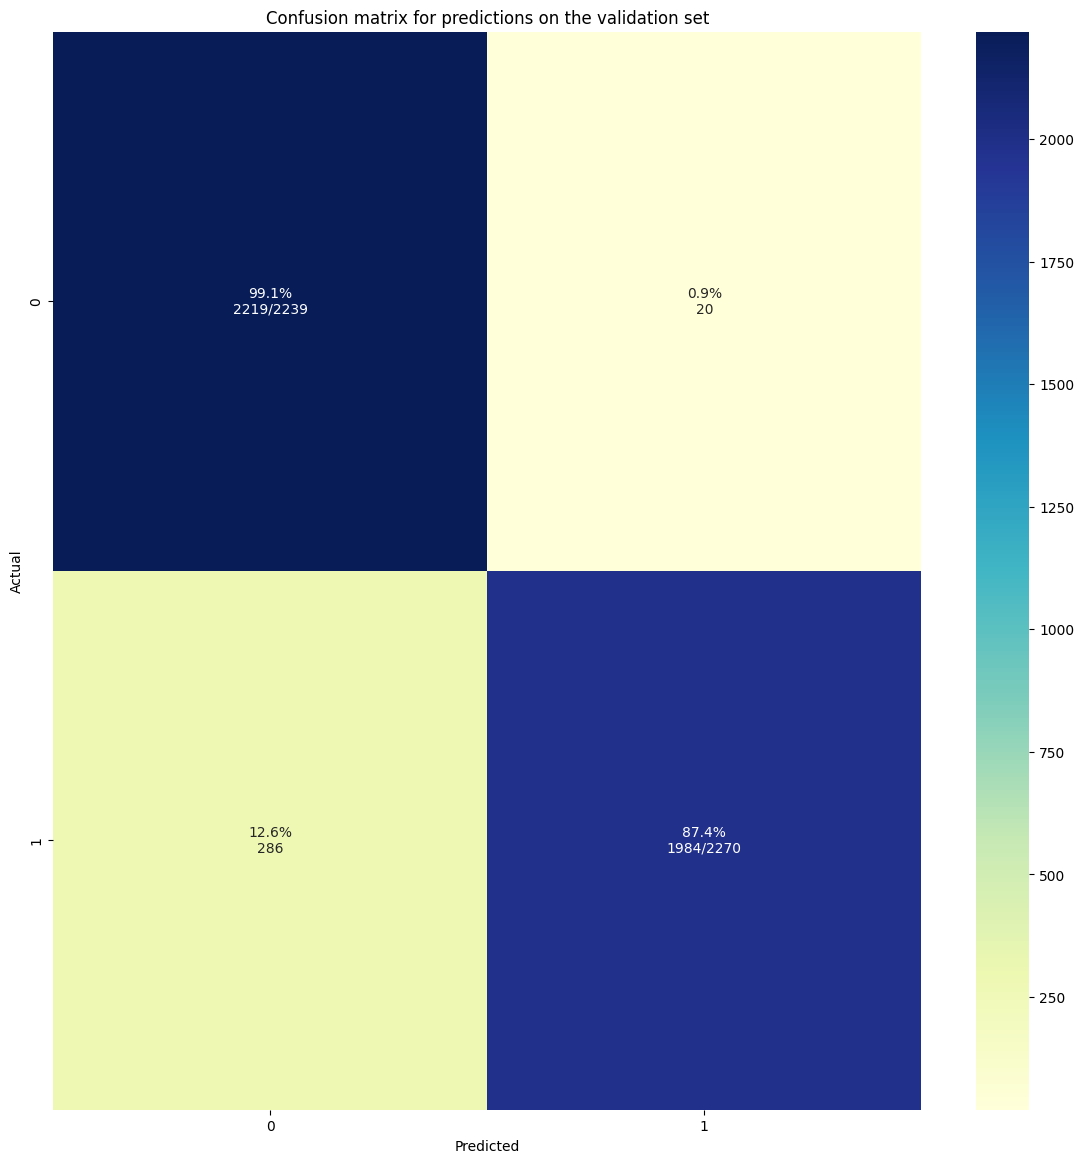

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
plot_cm(y_dev,y_pred_dev, 'Confusion matrix for predictions on the validation set')
f1_score(y_dev, y_pred_dev, average = 'macro')

####5.3.3. Evaluate Test Dataframe & Confuse Matrix

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9321874133629054

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9006
           1       0.99      0.87      0.93      9029

    accuracy                           0.93     18035
   macro avg       0.94      0.93      0.93     18035
weighted avg       0.94      0.93      0.93     18035



0.9319715167092304

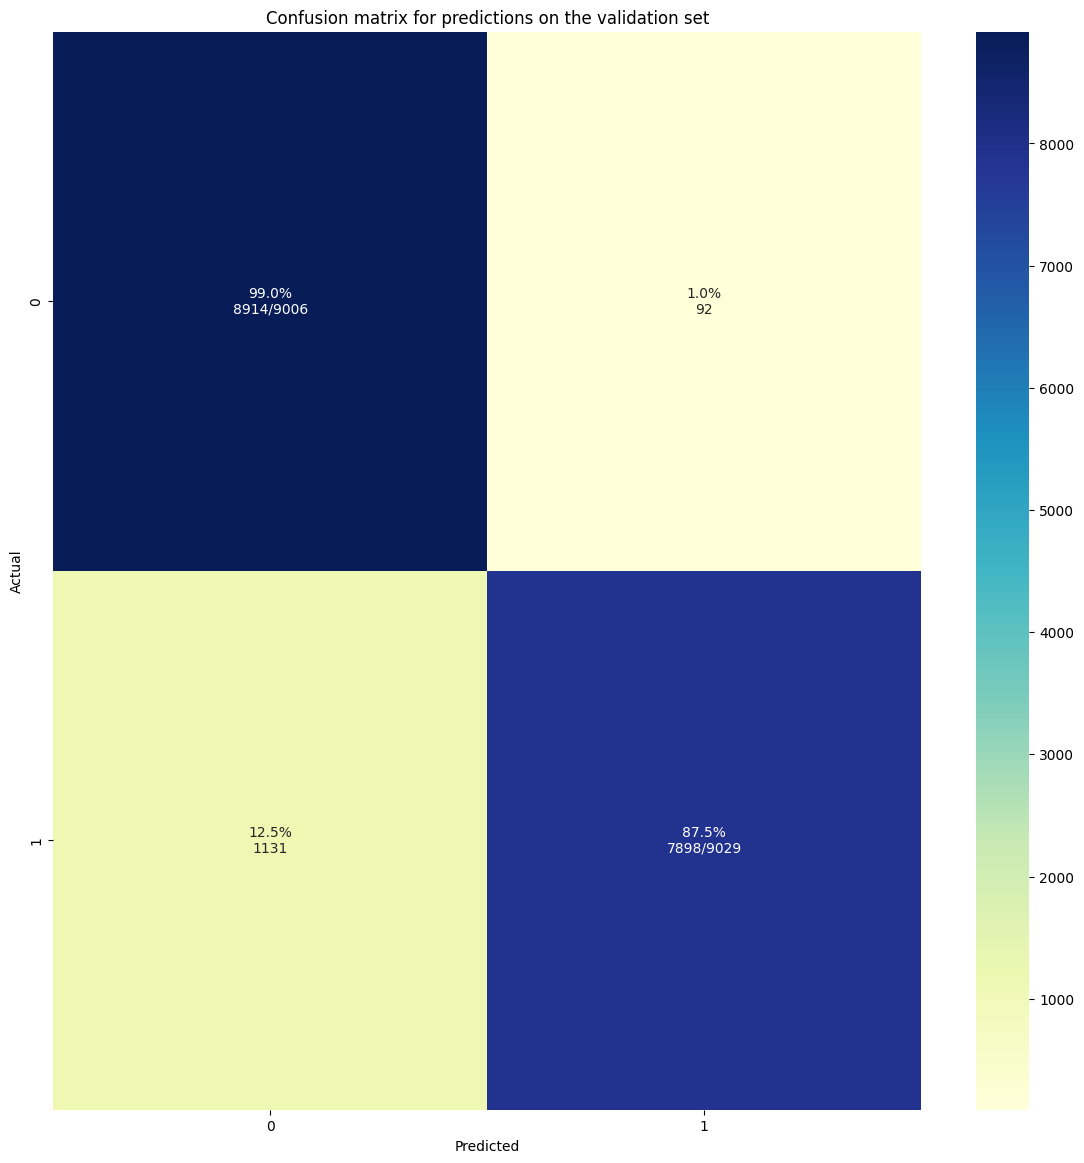

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
plot_cm(y_test,y_pred, 'Confusion matrix for predictions on the validation set')
f1_score(y_test, y_pred, average = 'macro')

##5.4. Decision Tree

####5.4.1. Train model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20, 100, 1000],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['int', 'float', 'auto', 'sqrt', 'log2'],
}

model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
print("Best parameters found: ", model.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best parameters found:  {'criterion': 'entropy', 'max_depth': 1000, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1350 fits failed out of a total of 3375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
675 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

####5.4.2. Evaluate Dev Dataframe & Confuse Matrix

In [ ]:
#tinh chinh tham so
from sklearn.metrics import accuracy_score
y_pred_dev = model.predict(X_dev)
accuracy = accuracy_score(y_dev, y_pred_dev)
accuracy

0.9385673098247949

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
class_report = classification_report(y_dev, y_pred_dev)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2239
           1       0.99      0.89      0.94      2270

    accuracy                           0.94      4509
   macro avg       0.94      0.94      0.94      4509
weighted avg       0.94      0.94      0.94      4509



0.9384413043912198

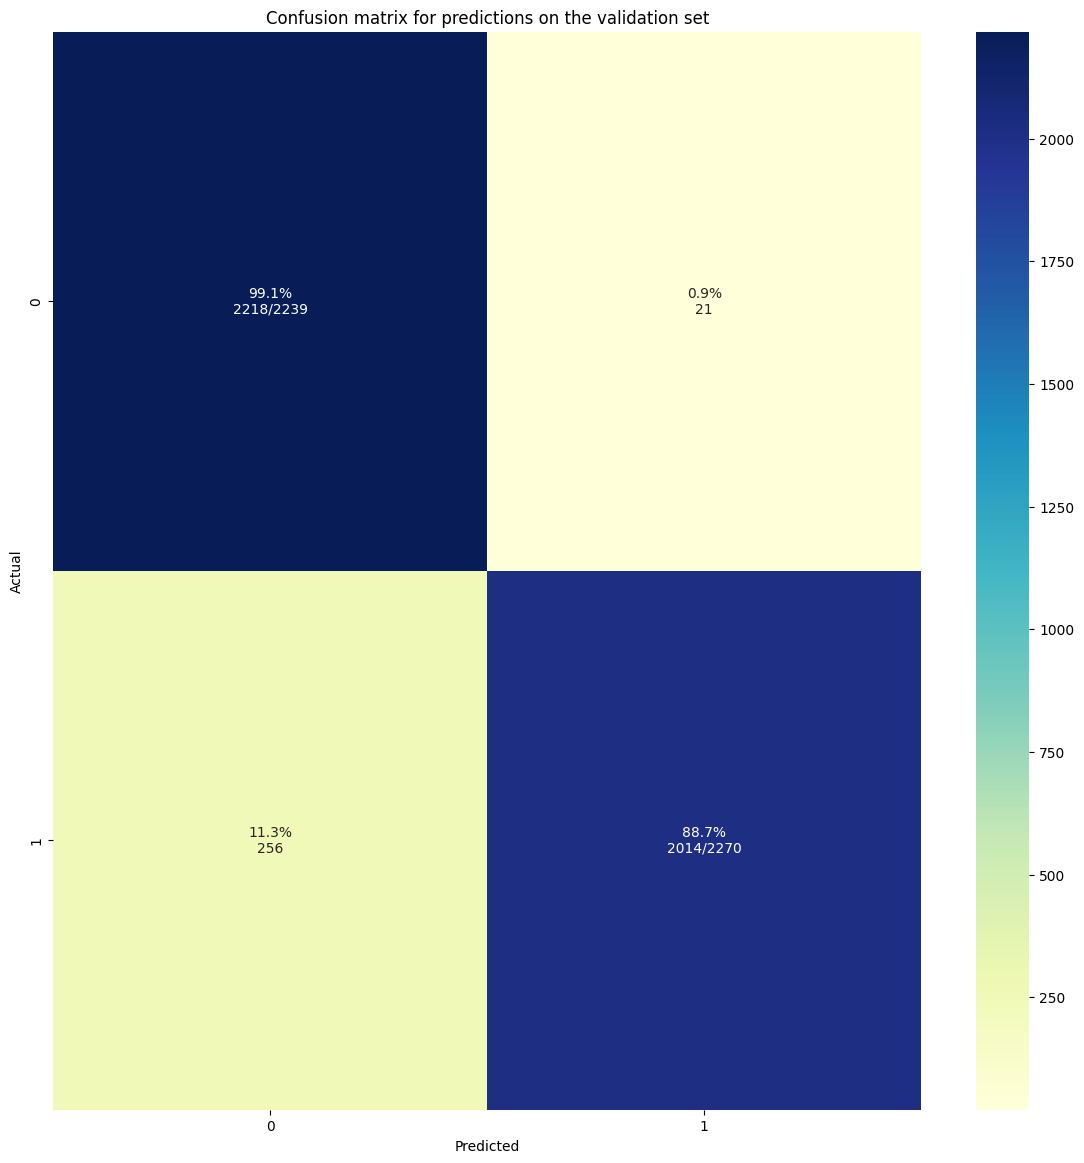

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
plot_cm(y_dev,y_pred_dev, 'Confusion matrix for predictions on the validation set')
f1_score(y_dev, y_pred_dev, average = 'macro')

####5.4.3. Evaluate Test Dataframe & Confuse Matrix

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9402827834765733

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9006
           1       0.99      0.89      0.94      9029

    accuracy                           0.94     18035
   macro avg       0.94      0.94      0.94     18035
weighted avg       0.94      0.94      0.94     18035



0.9401422074483573

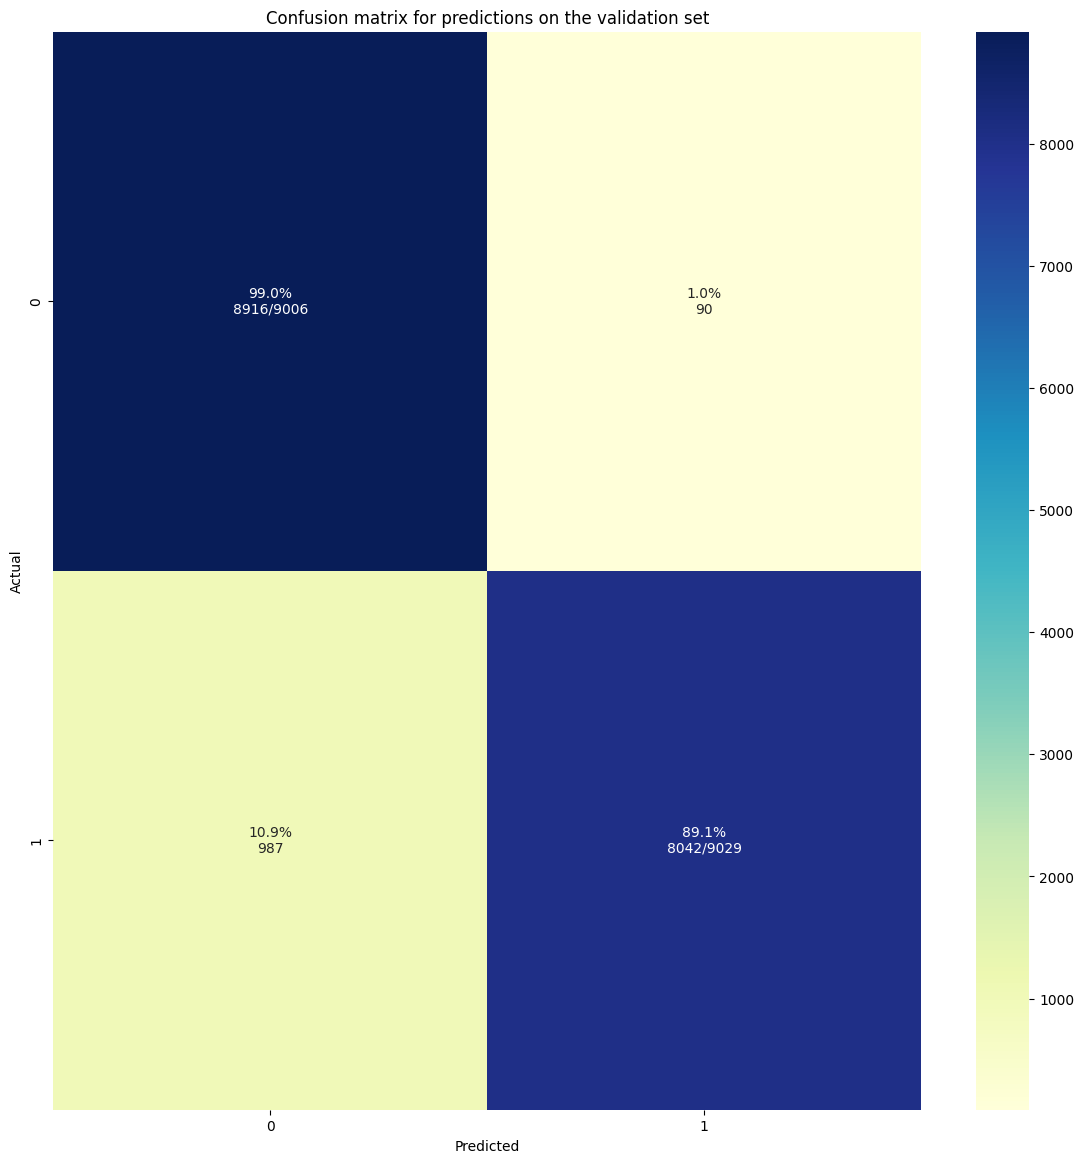

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
plot_cm(y_test,y_pred, 'Confusion matrix for predictions on the validation set')
f1_score(y_test, y_pred, average = 'macro')

##5.5. Neural Network

###5.5.1. Train model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_dev = to_categorical(y_dev, num_classes=2)

In [ ]:
# Tạo một mô hình Sequential
model = Sequential()

# Thêm các layer vào mô hình
model.add(Dense(units=123, activation='relu', input_shape=(10, )))  # Layer input
model.add(Dense(units=128, activation='relu'))  # Hidden layer
model.add(Dropout(0.01))
model.add(Dense(units=64, activation='relu'))  # Hidden layer
model.add(Dropout(0.01))
model.add(Dense(units=32, activation='relu'))  # Hidden layer
model.add(Dropout(0.01))
model.add(Dense(units=16, activation='relu'))  # Hidden layer
model.add(Dropout(0.01))
model.add(Dense(units=8, activation='relu'))  # Hidden layer
model.add(Dropout(0.01))
model.add(Dense(units=4, activation='relu'))  # Hidden layer
model.add(Dropout(0.01))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 123)               1353      
                                                                 
 dense_1 (Dense)             (None, 128)               15872     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 10000, validation_data = (X_dev, y_dev), callbacks=[checkpoint])

Epoch 1/2000


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 9/13 [===================>..........] - ETA: 0s - loss: 0.0603 - accuracy: 0.9855 
Epoch 1: val_accuracy improved from -inf to 0.92659, saving model to best_model.h5
13/13 [==============================] - 2s 27ms/step - loss: 0.0581 - accuracy: 0.9843 - val_loss: 0.4342 - val_accuracy: 0.9266
Epoch 2/2000
 1/13 [=>............................] - ETA: 0s - loss: 0.0567 - accuracy: 0.9795

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch 751/2000
13/13 [==============================] - ETA: 0s - loss: 0.0813 - accuracy: 0.9742
Epoch 751: val_accuracy did not improve from 0.93280
13/13 [==============================] - 0s 12ms/step - loss: 0.0813 - accuracy: 0.9742 - val_loss: 0.6376 - val_accuracy: 0.9117
Epoch 752/2000
 7/13 [===============>..............] - ETA: 0s - loss: 0.0838 - accuracy: 0.9706
Epoch 752: val_accuracy did not improve from 0.93280
13/13 [==============================] - 0s 10ms/step - loss: 0.0826 - accuracy: 0.9712 - val_loss: 0.6304 - val_accuracy: 0.9115
Epoch 753/2000
 8/13 [=================>............] - ETA: 0s - loss: 0.0789 - accuracy: 0.9737
Epoch 753: val_accuracy did not improve from 0.93280
13/13 [==============================] - 0s 10ms/step - loss: 0.0795 - accuracy: 0.9745 - val_loss: 0.5998 - val_accuracy: 0.9197
Epoch 754/2000
 8/13 [=================>............] - ETA: 0s - loss: 0.0756 - accuracy: 0.9798
Ep

###5.5.2. MODEL EVALUATE

In [ ]:
from tensorflow.keras.models import load_model
# Tải model từ file
model = load_model('/content/best_model.h5')

In [ ]:
Test_array = model.predict(X_test)

564/564 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np
y_predict = np.argmax(Test_array, axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9357360687551982

0.9356205368927766

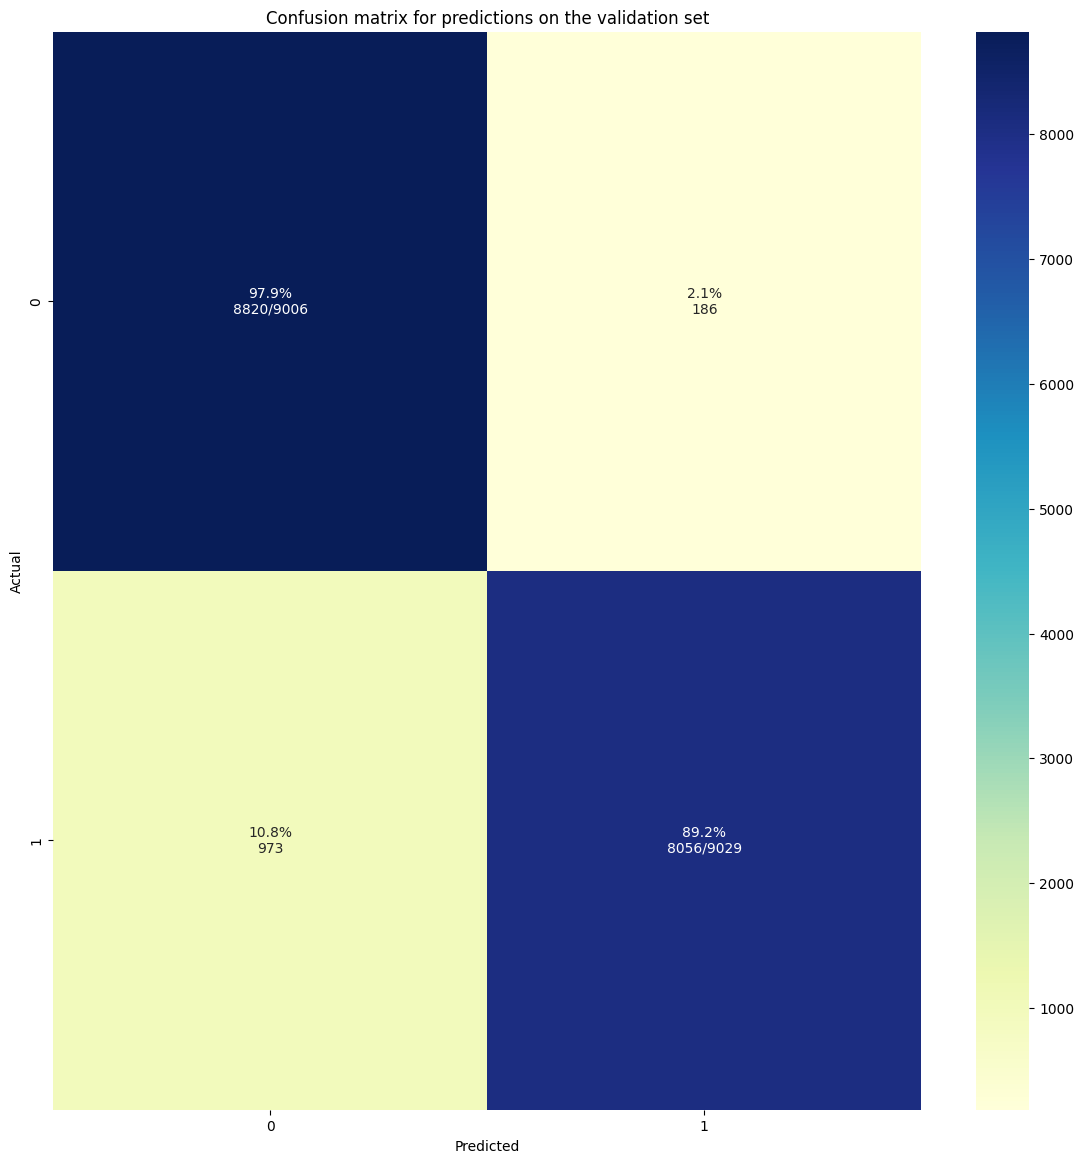

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
plot_cm(y_test,y_predict, 'Confusion matrix for predictions on the validation set')
f1_score(y_test, y_predict, average = 'macro')

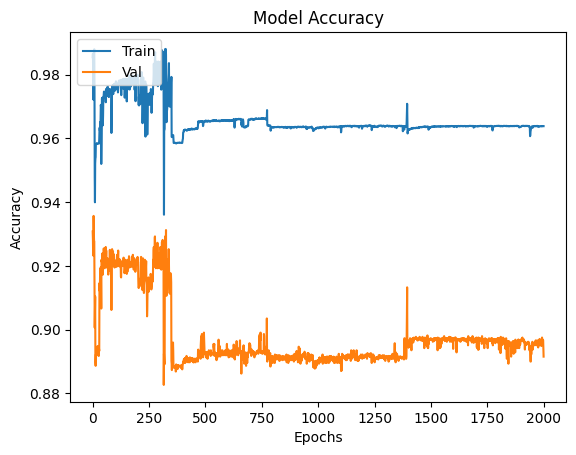

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

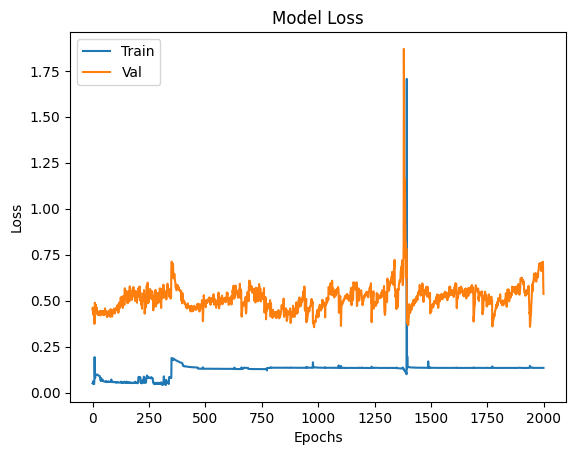

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
class_report = classification_report(y_test, y_predict)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9006
           1       0.98      0.89      0.93      9029

    accuracy                           0.94     18035
   macro avg       0.94      0.94      0.94     18035
weighted avg       0.94      0.94      0.94     18035

